# Sound classification techniques

This is the coding template for the final assessment of MTH786U/P in Semester A of 2021/2022.

The goal of this assessment is to classify audio files by using different sound features and to present your results in a written report (at most $8$ pages). The assessment is formed of three parts: 
1) filling in the missing parts of this Jupyter notebook,   
2) applying learned concepts from this notebook and the module MTH786 in general to the Audio MNIST classification problem, and   
3) presenting your results in a written report (written in $\LaTeX$).

Follow the instructions in this template in order to complete the first part of your assessment. Please only modify cells where you are instructed to do so.
Use the available cells to introduce the code. You can add additional cells if needed, without amending the template structure: don't remove, split, move existing cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. We load the Numpy and Matplotlib libraries. Please do not add any additional libraries if not instructed to do so. Save this Jupyter Notebook with the name **MTH786FinalProject.ipynb**. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Spotify music classification


For the first part of your final assessment you are required to implement the logistic regression model for binary classification problems as introduced in the lectures. Following up on what you have learned in the lectures and tutorials, complete the following tasks.

### Question 1a [7 marks]
Write a function $\mathtt{linear\_model\_function}$ that implements a linear model function for binary logistic regression defined as:
$$
f\left(\mathbf{x}, \mathbf{w}\right)
= \left\langle \phi\left(\mathbf{x}\right),\mathbf{w}\right\rangle,
$$
where $\phi\left(\mathbf{x}\right)$ is an augmented data vector and $\mathbf{w}$ is a weight vector. Your function should take two arguments: 
- *data_matrix*: two-dimensional NumPy array containing augmented data row-vectors for corresponding data samples;
- *weights*: weights column-vector.

The function should output a column-vector of the model function values for corresponding data samples.

In [4]:
def linear_model_function(data_matrix, weights):
    # YOUR CODE HERE
    return data_matrix@weights

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [5]:
test_data_matrix = np.array([[1, -0.15771414, -0.75293918, -0.0130713],\
                             [1, -0.3521762, 0.19650084, 1.94050566],\
                             [1, 1.30917135,  1.69791787, -0.91502836]])
test_weights = np.array([[0.46390948], [-1.15729779], [0.23372497],
                         [-1.5223521]])
test_model_function_values = np.array([[0.4903501], [-2.0367235], [0.7386495]])
np.testing.assert_almost_equal(
    linear_model_function(test_data_matrix, test_weights),
    test_model_function_values)

In [6]:
print(linear_model_function(test_data_matrix,test_weights))

[[ 0.49035014]
 [-2.0367235 ]
 [ 0.73864952]]


In [7]:
#HIDDEN TEST


For the next exercise, write a function $\mathtt{binary\_logistic\_activation\_function}$ that takes an argument named *inputs* and returns the output of the sigmoid function
$$
\sigma\left(\mathbf{x}\right) = \frac{1}{1+\mathrm{e}^{-\mathbf{x}}}.
$$ 
applied to the NumPy array *input*. Here $\mathbf{x}$ is the mathematical notation for the argument *input*. The function should return NumPy array of the same shape as the *input*.

In [8]:
def binary_logistic_activation_function(inputs):
    # YOUR CODE HERE
    return 1/(1 + np.exp(-inputs))

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [9]:
test_row_inputs = np.array([0, 1, -3, np.log(2), 0.4223615])
test_row_outputs = np.array([0.5, 0.7310586, 0.0474259, 0.6666667, 0.6040482])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_row_inputs), test_row_outputs)

In [10]:
test_column_inputs = np.array([[-2], [0.5], [np.log(1 / 3)], [0.26478703]])
test_column_outputs = np.array([[0.1192029], [0.6224593], [0.25], [0.5658127]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_column_inputs),
    test_column_outputs)

In [11]:
test_matrix_inputs = np.array([[2, np.log(1 / 2)], [0.26478703, np.sin(1)]])
test_matrix_outputs = np.array([[0.8807971, 1 / 3], [0.5658127, 0.6987749]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_matrix_inputs),
    test_matrix_outputs)

Write two functions $\mathtt{binary\_logistic\_prediction\_function}$ and $\mathtt{classification\_accuracy}$ that turn your predictions into classification results and that compare how many labels have been classified correctly. The function $\mathtt{binary\_logistic\_prediction\_function}$ takes the argument *logistic_values* as inputs and returns a vector of class labels with binary values in $\left\{0, 1\right\}$ as its output. The function $\mathtt{classification\_accuracy}$ takes two inputs *true_labels* and *recovered_labels* and returns the percentage of
correctly classified labels divided by $100$.

In [12]:
def binary_logistic_prediction_function(logistic_values):
    # YOUR CODE HERE
    r,c=logistic_values.shape
    binary_values=np.copy(logistic_values)
    for i in range(r):
        for j in range(c):
            if binary_values[i][j]>0.5:
                binary_values[i][j]=1
            else:
                binary_values[i][j]=0
    
    return binary_values


In [13]:
test_logistic_values = np.array([[0.30493025], [0.80419595], [0.56509748], [0.23903961],\
                                 [0.9773376],  [0.28956517], [0.83508464], [0.57761601],\
                                 [0.41169655], [0.97455507], [0.1095421],  [0.21852319]])
print(test_logistic_values )
print(binary_logistic_prediction_function(test_logistic_values))

[[0.30493025]
 [0.80419595]
 [0.56509748]
 [0.23903961]
 [0.9773376 ]
 [0.28956517]
 [0.83508464]
 [0.57761601]
 [0.41169655]
 [0.97455507]
 [0.1095421 ]
 [0.21852319]]
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [15]:
test_logistic_values = np.array([[0.30493025], [0.80419595], [0.56509748], [0.23903961],\
                                 [0.9773376],  [0.28956517], [0.83508464], [0.57761601],\
                                 [0.41169655], [0.97455507], [0.1095421],  [0.21852319]])
test_class_labels = np.array([[0], [1], [1], [0],\
                              [1], [0], [1], [1],\
                              [0], [1], [0], [0]])
np.testing.assert_array_almost_equal(
    binary_logistic_prediction_function(test_logistic_values),
    test_class_labels)

In [16]:
"""" def classification_accuracy(true_labels, recovered_labels):
    # YOUR CODE HERE
    r,c=true_labels.shape
    match=0
    for i in range(r):
        for j in range(c):
            if true_labels[i][j]==recovered_labels[i][j]:
                match+=1
    acc=match/(r*c)        
    return acc
    """
  

'" def classification_accuracy(true_labels, recovered_labels):\n    # YOUR CODE HERE\n    r,c=true_labels.shape\n    match=0\n    for i in range(r):\n        for j in range(c):\n            if true_labels[i][j]==recovered_labels[i][j]:\n                match+=1\n    acc=match/(r*c)        \n    return acc\n    '

In [17]:
def classification_accuracy(true_labels, recovered_labels):
    equal_labels = recovered_labels == true_labels
    return np.mean(equal_labels)

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [18]:
test_true_labels = np.array([[0], [1], [1], [0], [1], [1], [0], [0], [1], [0]])
test_recovered_labels = np.array([[1], [1], [0], [0], [0], [1], [1], [0], [1],
                                  [1]])
np.testing.assert_almost_equal(
    classification_accuracy(test_true_labels, test_recovered_labels), 0.5)

### Question 1b [5 marks]
Write two functions that implement the cost function for binary logistic regression as well as its gradient, as defined below. $$
\mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(\sum\limits_{i=1}^s
\log\left[1+\exp\left(f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right)\right] - y_i\cdot f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right),
$$
where $\phi\left(\mathbf{x}^{(i)}\right)$ is an augmented $i$-th data vector and $f$ is a model function. In the case of linear model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ one has 
$$
\nabla \mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \phi\left(\mathbf{x}^{(i)}\right)\cdot\sigma
  \left(\left\langle \phi\left(\mathbf{x}^{(i)}\right),\mathbf{w} \right\rangle \right) - y_i\cdot \phi\left(\mathbf{x}^{(i)}\right)
  \right),
$$
where $y_i$ are the corresponding data labels. 

The cost function is should be called $\mathtt{binary\_logistic\_regression\_cost\_function}$ and should take the NumPy arrays *data_matrix*, *data_labels* and
*weights* as arguments. Subsequently, write a method $\mathtt{binary\_logistic\_regression\_gradient}$ that takes the same inputs as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and
computes the gradient of the binary logistic regression cost function as defined in the lecture.

In [19]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,
                                             weights):
    # YOUR CODE HERE
    s=data_matrix.shape[0]
    L=(1/s)*np.sum(np.log(1+np.exp(linear_model_function(data_matrix, weights)))
                   -(data_labels*linear_model_function(data_matrix, weights)))
    return L

In [20]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    # YOUR CODE HERE
    s=data_matrix.shape[0]
    gL=(1/s)*data_matrix.T@ (binary_logistic_activation_function(
        linear_model_function(data_matrix, weights)) - data_labels)
    return gL

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [21]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_cost_function(data_matrix=test_data_matrix,
                                             data_labels=test_data_labels,
                                             weights=test_weights), 0.846796)

In [22]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_gradient = np.array([[-0.006401], [0.150453], [0.074496], [-0.120697]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_gradient(data_matrix=test_data_matrix,
                                        data_labels=test_data_labels,
                                        weights=test_weights), test_gradient)

In [23]:
print(test_data_matrix)

[[ 1.         -0.12793802 -0.19751682  0.15226261]
 [ 1.         -0.2000033   0.52618148  0.8782188 ]
 [ 1.         -0.8613664   0.30565866 -0.49296481]
 [ 1.         -0.84047233  0.9252299   0.99071071]
 [ 1.         -0.1042736   0.52956168 -0.47798761]
 [ 1.          0.11284415 -0.94223132  0.65812316]
 [ 1.         -0.24878785  0.85320211 -0.20377839]
 [ 1.          0.86694977 -0.55784702  0.39560232]
 [ 1.          0.63581885 -0.11724269 -0.0979702 ]
 [ 1.          0.92166492  0.76064856  0.20755241]]


In [24]:
print(binary_logistic_regression_gradient(data_matrix=test_data_matrix,
                                        data_labels=test_data_labels,
                                        weights=test_weights))

[[-0.006401  ]
 [ 0.15045298]
 [ 0.07449562]
 [-0.12069674]]


After writing Python functions for the binary logistic regression cost function and its gradient, fill in the following notebook functions for the implementation of a gradient descent method. For the
first function it is acceptable to follow the solution presented in the class assignments, or to use your own version if is consistent with function header and output. For the second gradient descent function named $\mathtt{gradient\_descent\_v2}$, modify the gradient descent method to include a stopping criterion that ensures that gradient descent stops once
$$
\left\| \nabla L\left(\mathbf{w}^{(k)}\right)\right\|_2 \leq \mathrm{tolerance},
$$
is satisfied. Here $L$ and $\mathbf{w}^{(k)}$ are the mathematical representations of the objective $\mathrm{objective}$ and the weight vector *weights*, at iteration *k*. The parameter *tolerance* is a non-negative threshold
that controls the Euclidean norm of the gradient. The function $\mathtt{gradient\_descent\_v2}$ takes the arguments $\mathtt{objective}$, $\mathtt{gradient}$, *initial_weights*, *step_size*, *no_of_iterations*, *print_output* and
*tolerance*. The arguments $\mathtt{objective}$ and $\mathtt{gradient}$ are functions that can take (weight-)arrays as arguments and return the scalar value of the objective, respectively the array representation of the corresponding gradient. The argument *initial_weights* specifies the initial value of the variable over which you iterate. The argument *step_size* is the gradient descent step-size parameter, the argument *no_of_iterations* specifies the maximum number of iterations, *print_output* determines after how many iterations the function produces a text output and *tolerance* controls the norm of the gradient as described in the equation above. Both functions should return the last value of iteration variable (*weights*) together with the values of objective function evaluated at every iteration step.

In [25]:
def gradient_descent(objective,
                     gradient,
                     initial_weights,
                     step_size=1,
                     no_of_iterations=100,
                     print_output=10):
    # YOUR CODE HERE
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In [556]:
def gradient_descent_v2(objective, gradient, initial_weights, 
                        step_size=1, no_of_iterations=100, print_output=10, tolerance=1e-6):
    # YOUR CODE HERE
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
 
    for counter in range(no_of_iterations):
        if  np.linalg.norm(gradient(weights))<=tolerance:
            print(np.linalg.norm(gradient(weights)))
            break
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    
        
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1, 
                m=no_of_iterations, o=objective_values[counter]))
    
    return weights, objective_values

In [522]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[0],\
                          np.array([-0.564103, -0.538462]))

Iteration 10/100, objective = -3.0256011293288547.
Iteration 20/100, objective = -3.0256410067129824.
Iteration 30/100, objective = -3.025641025632046.
Iteration 40/100, objective = -3.0256410256410216.
Iteration 50/100, objective = -3.025641025641026.
Iteration 60/100, objective = -3.0256410256410255.
Iteration 70/100, objective = -3.0256410256410255.
Iteration 80/100, objective = -3.0256410256410255.
Iteration 90/100, objective = -3.025641025641025.
Iteration 100/100, objective = -3.0256410256410255.
Iteration completed after 100/100, objective = -3.0256410256410255.


In [523]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(len(gradient_descent_v2(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[1])-1,\
                          35) ### the iteration should stop after 35 steps

Iteration 10/100, objective = -3.0256011293288547.
Iteration 20/100, objective = -3.0256410067129824.
Iteration 30/100, objective = -3.025641025632046.
8.356857861861452e-07
Iteration completed after 36/100, objective = -3.025641025640935.


### Question 1c [7 marks]
We proceed by testing your implementation on the [Spotify(c)](https://www.spotify.com/) music dataset. You are asked to analyse the data collected by Brice Vergnou on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation). Please take a look at the corresponding webpage in case you want to know more about the data. The dataset consists of $150$ songs (randomly selected from $195$ available on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation)). The testing set consists of the rest $45$ songs. Each song is characterised by $13$ numbers representing
- $\mathtt{acousticness}$ : A confidence measure from $0.0$ to $1.0$ of whether the track is acoustic. $1.0$ represents high confidence the track is acoustic.
- $\mathtt{danceability}$ : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of $0.0$ is least danceable and $1.0$ is most danceable.
- $\mathtt{duration\_ms}$ : The duration of the track in milliseconds.
- $\mathtt{energy}$ : Energy is a measure from $0.0$ to $1.0$ and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- $\mathtt{instrumentalness}$ : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to $1.0$, the greater likelihood the track contains no vocal content. Values above $0.5$ are intended to represent instrumental tracks, but confidence is higher as the value approaches $1.0$.
- $\mathtt{key}$ : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. $0 = C$, $1 = C\sharp/D\flat$, $2 = D$, and so on.
- $\mathtt{liveness}$ : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above $0.8$ provides strong likelihood that the track is live.
- $\mathtt{loudness}$ : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between $-60$ and $0$ db.
- $\mathtt{mode}$ : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by $1$ and minor is $0$.
- $\mathtt{speechiness}$ : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to $1.0$ the attribute value. Values above $0.66$ describe tracks that are probably made entirely of spoken words. Values between $0.33$ and $0.66$ describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below $0.33$ most likely represent music and other non-speech-like tracks.
- $\mathtt{tempo}$ : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- $\mathtt{time\_signature}$ : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- $\mathtt{valence}$ : A measure from $0.0$ to $1.0$ describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Every song included in the training set is also assigned with the binary ($0$ or $1$) variable that provides an information on the dataset author's music preferences. 

The code in the following cell 
- loads and stores the training and testing dataset into corresponding NumPy arrays: *spotify_training_data_input*, *spotify_training_data_labels*, *spotify_testing_data_input*.

In [246]:
spotify_training_data = np.genfromtxt('spotify_training.csv',
                                      skip_header=True,
                                      dtype=None,
                                      delimiter=',')
spotify_testing_data_input = np.genfromtxt('spotify_testing.csv',
                                           skip_header=True,
                                           dtype=None,
                                           delimiter=',')
spotify_training_data_input = spotify_training_data[:, :-1]
spotify_training_data_labels = spotify_training_data[:, -1].reshape(-1, 1)

In the following cell, write a function $\mathtt{standardise}$ that standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should return a triple: the normalised matrix, the row of column averages and the row of column standard deviations.

In [247]:
def standardise(data_matrix):
    # YOUR CODE HERE
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [248]:
test_data_matrix = np.array([[1, 2], [3, 4], [5, 6]])
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[0],
    np.array([[-1.22474487, -1.22474487], [0, 0], [1.22474487, 1.22474487]]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[1], np.array([3, 4]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[2],
    np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)]))

Now write a function $\mathtt{de\_standardise}$ that de-standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should take three NumPy array: *standardised_matrix*, *row_of_means*, *row_of_stds* and reconstruct the original matrix used  to obtain a standardised one.

In [249]:
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    # YOUR CODE HERE
    return standardised_matrix*row_of_stds+row_of_means

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [250]:
test_standardised_matrix = np.array([[-1.22474487, -1.22474487], [0, 0],
                                     [1.22474487, 1.22474487]])
test_row_of_means = np.array([3, 4])
test_row_of_stds = np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)])
np.testing.assert_array_almost_equal(
    de_standardise(test_standardised_matrix, test_row_of_means,
                   test_row_of_stds), np.array([[1, 2], [3, 4], [5, 6]]))

Apply data standardisation as per above to the Spotify data, both training and testing.

In [251]:
spotify_training_data_input, spotify_row_of_avgs, spotify_row_of_stds = standardise(
    spotify_training_data_input)
spotify_testing_data_input = (spotify_testing_data_input -
                              spotify_row_of_avgs) / spotify_row_of_stds

In order to prepare our normalised data for a data analysis we also need to build an augmented data matrix. Implement function $\mathtt{linear\_regression\_data}$ that computes (and outputs) the linear regression *data_matrix* for a given *data_inputs* matrix.

In [252]:
def linear_regression_data(data_inputs):
    # YOUR CODE HERE
    first_column = np.ones((len(data_inputs), 1))
    linear_data_matrix = np.c_[first_column, data_inputs]
    return linear_data_matrix



Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [253]:
test_data_inputs = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
np.testing.assert_array_equal(
    linear_regression_data(test_data_inputs),
    np.array([[1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5]]))

You are now asked to apply the above to the Spotify dataset:
- Define a linear regression data matrix corresponding to Spotify training data. Store the matrix as *spotify_training_data_matrix*;
- Define an objective lambda function $\mathtt{spotify\_objective}$ with the argument *weights* based on the $\mathtt{binary\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *spotify_training_data_matrix*) and *data_labels* (equal to *spotify_training_data_labels*). Repeat the same exercise to create a function $\mathtt{spotify\_gradient}$ based on $\mathtt{binary\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero column-vector of appropriate length and store it as *spotify_initial_weights*;
- Define the step-size of gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *spotify_training_data_matrix*. Store it as *spotify_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-2*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *spotify_optimal_weights*, *spotify_objective_values*.


In [525]:
# YOUR CODE HERE
spotify_training_data_matrix=linear_regression_data(spotify_training_data_input)

spotify_objective=lambda weights:binary_logistic_regression_cost_function(spotify_training_data_matrix,
                                                                           spotify_training_data_labels,weights)
spotify_gradient=lambda weights:binary_logistic_regression_gradient(spotify_training_data_matrix,
                                                                       spotify_training_data_labels,weights)


spotify_initial_weights=np.zeros((len(spotify_training_data_matrix[0]),1))
s=len(spotify_training_data_matrix)

spotify_step_size=(3.9*s)/np.linalg.norm(spotify_training_data_matrix)**2
spotify_optimal_weights,spotify_objective_values=gradient_descent_v2(spotify_objective, spotify_gradient, 
                                                                     spotify_initial_weights, 
                        spotify_step_size, no_of_iterations=1000, print_output=10, tolerance=1e-2)


Iteration 10/1000, objective = 0.36562174972555955.
Iteration 20/1000, objective = 0.3059645152012028.
Iteration 30/1000, objective = 0.2790582725994416.
Iteration 40/1000, objective = 0.26279611534355557.
Iteration 50/1000, objective = 0.2516178553755304.
Iteration 60/1000, objective = 0.243342246725595.
Iteration 70/1000, objective = 0.23690261321297965.
Iteration 80/1000, objective = 0.23170531567632613.
Iteration 90/1000, objective = 0.2273907132713435.
Iteration 100/1000, objective = 0.22372733676269302.
Iteration 110/1000, objective = 0.2205592210070097.
Iteration 120/1000, objective = 0.21777738870557936.
Iteration 130/1000, objective = 0.21530339462833417.
Iteration 140/1000, objective = 0.21307934159732497.
Iteration 150/1000, objective = 0.21106157176816084.
Iteration 160/1000, objective = 0.20921654328811126.
Iteration 170/1000, objective = 0.20751805697725523.
Iteration 180/1000, objective = 0.20594534439896256.
Iteration 190/1000, objective = 0.2044817210576845.
Iteration 

In [255]:
1e-2

0.01

Let us now evaluate the classification accuracy.

In [526]:
# YOUR CODE HERE

spotify_training_regression_values = linear_model_function(
    spotify_training_data_matrix, spotify_optimal_weights)

spotify_training_predicted_labels=binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_training_regression_values))

spotify_classification_accuracy=classification_accuracy(spotify_training_data_labels,spotify_training_predicted_labels)
print(spotify_classification_accuracy*150)

139.0


The correct classification accuracy is awarded **1 mark** as well as the correct weights vector.

In [527]:
np.testing.assert_array_almost_equal(spotify_classification_accuracy,
                                     139 / 150)

In [528]:
np.testing.assert_array_almost_equal(spotify_optimal_weights, np.array([[-1.29646411], [ 1.63631427], [ 0.19574476],\
                                                                        [-0.22493942], [ 2.55021477], [ 0.06314623],\
                                                                        [ 1.07931859], [ 0.28767344], [-1.44998303],\
                                                                        [ 0.271802  ], [-0.44153896], [ 0.75870886],\
                                                                        [-2.35384176], [ 0.66464042]]))

In the next hidden cell your model would be tested against the training data. The correct result is awarded **2 marks**.

### Question 1d [7 marks]
In this section we attempt to increase the classification accuracy by considering the ridge binary logistic regression. 

Define two functions $\mathtt{ridge\_binary\_logistic\_regression\_cost\_function}$ and $\mathtt{ridge\_binary\_logistic\_regression\_gradient}$ that take $4$ arguments: the NumPy arrays *data_matrix*, *data_labels* and *weights*, and a positive float number *regularisation_parameter*. The modified cost function is defined as
$$
\mathrm{L}_{\alpha}\left(\mathbf{w}\right) = \mathrm{L}\left(\mathbf{w}\right) + \frac{\alpha}{2}\left\|\mathbf{w}\right\|^2,
$$
where $\mathrm{L}\left(\mathbf{w}\right)$ is a cost function for the binary logistic regression defined above, while the gradient function correspondingly is given by
$$
\nabla \mathrm{L}_{\alpha}\left(\mathbf{w}\right) = 
\nabla \mathrm{L}\left(\mathbf{w}\right) + \alpha \mathbf{w},
$$
where $\alpha$ is a mathematical representation of the *regularisation_parameter*.

In [530]:
def ridge_binary_logistic_regression_cost_function(data_matrix, data_labels,
                                                   weights,
                                                   regularisation_parameter):
    # YOUR CODE HERE
    rL=binary_logistic_regression_cost_function(data_matrix,data_labels,weights)+\
      (regularisation_parameter/2)*np.linalg.norm(weights)**2
    
    return rL


In [531]:
def ridge_binary_logistic_regression_gradient(data_matrix, data_labels,
                                              weights,
                                              regularisation_parameter):
    # YOUR CODE HERE
    rgL=binary_logistic_regression_gradient(data_matrix,data_labels,weights)+regularisation_parameter*weights
    
    return rgL

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [532]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
regularisation_parameter = 1
np.testing.assert_array_almost_equal(
    ridge_binary_logistic_regression_cost_function(
        data_matrix=test_data_matrix,
        data_labels=test_data_labels,
        weights=test_weights,
        regularisation_parameter=regularisation_parameter), 1.304991)

In [533]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
regularisation_parameter = 1
test_gradient = np.array([[-0.111815], [0.728467], [0.746135], [-0.467219]])
np.testing.assert_array_almost_equal(
    ridge_binary_logistic_regression_gradient(
        data_matrix=test_data_matrix,
        data_labels=test_data_labels,
        weights=test_weights,
        regularisation_parameter=regularisation_parameter), test_gradient)

Write a function $\mathtt{grid\_search}$ that performs a search for a minimum value of a given function on a given grid points. You function should take two parameters 
- *objective* - a lambda-function to minimise taking one argument;
- *grid* - is a list of grid points
The function should return the grid point with the minimal value of objective function.

In [534]:
def grid_search(objective, grid):
    # YOUR CODE HERE
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

Test your functions with the following unit test. Passing the test will be awarded with **1 mark**.

In [535]:
test_objective = lambda x: x[0]**2 - 2 * x[0] * x[1] + 2 * x[1]**2 + x[
    0] - 3 * x[1]
test_grid = [(x, y) for x in range(5) for y in range(5)]
np.testing.assert_almost_equal(grid_search(test_objective, test_grid), (0, 1))

You are now asked to run the below code to find the optimal value of a hyperparameter *regularisation_parameter* and then find the *spotify_optimal_weights* corresponding to the value of the hyperparameter.

In [536]:
spotify_regularisation_parameter_grid = np.arange(0, .1, 0.01)

spotify_validation_error = lambda regularisation_parameter: 1-classification_accuracy(spotify_training_data_labels,\
                    binary_logistic_prediction_function(
                    binary_logistic_activation_function(
                    linear_model_function(spotify_training_data_matrix,
                    gradient_descent_v2(
                    objective = lambda weights: ridge_binary_logistic_regression_cost_function(
                                spotify_training_data_matrix,
                                spotify_training_data_labels,
                                weights,
                                regularisation_parameter),
                    gradient = lambda weights: ridge_binary_logistic_regression_gradient(
                                spotify_training_data_matrix,
                                spotify_training_data_labels,
                                weights,
                                regularisation_parameter),
                    initial_weights = np.zeros(shape = (spotify_training_data_matrix.shape[1], 1)),
                    step_size = 1/(np.linalg.norm(spotify_training_data_matrix)**2/(3.9*len(spotify_training_data_matrix))+regularisation_parameter),
                    no_of_iterations = 2000,
                    print_output = 2001,
                    tolerance = 1e-5
                    )[0]))))

spotify_optimal_regularisation_parameter = grid_search(
    spotify_validation_error, spotify_regularisation_parameter_grid)

spotify_optimal_weights = gradient_descent_v2(
    objective=lambda weights: ridge_binary_logistic_regression_cost_function(
        spotify_training_data_matrix, spotify_training_data_labels, weights,
        spotify_optimal_regularisation_parameter),
    gradient=lambda weights: ridge_binary_logistic_regression_gradient(
        spotify_training_data_matrix, spotify_training_data_labels, weights,
        spotify_optimal_regularisation_parameter),
    initial_weights=np.zeros(shape=(spotify_training_data_matrix.shape[1], 1)),
    step_size=1 /
    (np.linalg.norm(spotify_training_data_matrix)**2 /
     (3.9 * len(spotify_training_data_matrix)) + regularisation_parameter),
    no_of_iterations=2000,
    print_output=2001,
    tolerance=1e-5)[0]

spotify_training_regression_values = linear_model_function(
    spotify_training_data_matrix, spotify_optimal_weights)
spotify_training_predicted_labels = binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_training_regression_values))
spotify_classification_accuracy = classification_accuracy(true_labels=spotify_training_data_labels,\
                                                         recovered_labels=spotify_training_predicted_labels)
print(
    "The classification accuracy for the training set is {p:.2f} %. This is achieved for the hyperparameter value {a}"
    .format(p=100 * spotify_classification_accuracy,
            a=spotify_optimal_regularisation_parameter))

Iteration completed after 2000/2000, objective = 0.16459394936632762.
9.979404336002995e-06
Iteration completed after 1637/2000, objective = 0.24916613118975584.
9.964899283209028e-06
Iteration completed after 953/2000, objective = 0.28121024507114634.
9.951570915736124e-06
Iteration completed after 677/2000, objective = 0.30325224596275335.
9.995645430710314e-06
Iteration completed after 526/2000, objective = 0.32046027270138944.
9.997011893878006e-06
Iteration completed after 431/2000, objective = 0.33471624654232496.
9.921767315102496e-06
Iteration completed after 366/2000, objective = 0.3469480847564081.
9.971658731984335e-06
Iteration completed after 318/2000, objective = 0.3576911694901299.
9.878564074062432e-06
Iteration completed after 282/2000, objective = 0.3672861041891093.
9.982603219162641e-06
Iteration completed after 253/2000, objective = 0.3759646213207154.
9.973597642127797e-06
Iteration completed after 859/2000, objective = 0.30325224596854944.
The classification accu

Test your results with the following unit tests. Correct value of the hyperparameter is awarded **1 mark** as well as the right classification accuracy for training set. In the next hidden cell your model would be tested against the training data. The correct result is awarded **2 marks**.

In [267]:
np.testing.assert_almost_equal(spotify_optimal_regularisation_parameter, 0.03)

In [268]:
np.testing.assert_almost_equal(spotify_classification_accuracy, 0.9266666)

# Sound classification techniques

This is the coding template for the final assessment of MTH786U/P in Semester A of 2021/2022.

The goal of this assessment is to classify audio files by using different sound features and to present your results in a written report (at most $8$ pages). The assessment is formed of three parts: 
1) filling in the missing parts of this Jupyter notebook,   
2) applying learned concepts from this notebook and the module MTH786 in general to the Audio MNIST classification problem, and   
3) presenting your results in a written report (written in $\LaTeX$).

Follow the instructions in this template in order to complete the first part of your assessment. Please only modify cells where you are instructed to do so.
Use the available cells to introduce the code. You can add additional cells if needed, without amending the template structure: don't remove, split, move existing cells.
Failure to comply may result in unexpected errors that can lead to mark deductions. We load the Numpy and Matplotlib libraries. Please do not add any additional libraries if not instructed to do so. Save this Jupyter Notebook with the name **MTH786FinalProject.ipynb**. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Spotify music classification


For the first part of your final assessment you are required to implement the logistic regression model for binary classification problems as introduced in the lectures. Following up on what you have learned in the lectures and tutorials, complete the following tasks.

### Question 1a [7 marks]
Write a function $\mathtt{linear\_model\_function}$ that implements a linear model function for binary logistic regression defined as:
$$
f\left(\mathbf{x}, \mathbf{w}\right)
= \left\langle \phi\left(\mathbf{x}\right),\mathbf{w}\right\rangle,
$$
where $\phi\left(\mathbf{x}\right)$ is an augmented data vector and $\mathbf{w}$ is a weight vector. Your function should take two arguments: 
- *data_matrix*: two-dimensional NumPy array containing augmented data row-vectors for corresponding data samples;
- *weights*: weights column-vector.

The function should output a column-vector of the model function values for corresponding data samples.

In [4]:
def linear_model_function(data_matrix, weights):
    # YOUR CODE HERE
    return data_matrix@weights

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [5]:
test_data_matrix = np.array([[1, -0.15771414, -0.75293918, -0.0130713],\
                             [1, -0.3521762, 0.19650084, 1.94050566],\
                             [1, 1.30917135,  1.69791787, -0.91502836]])
test_weights = np.array([[0.46390948], [-1.15729779], [0.23372497],
                         [-1.5223521]])
test_model_function_values = np.array([[0.4903501], [-2.0367235], [0.7386495]])
np.testing.assert_almost_equal(
    linear_model_function(test_data_matrix, test_weights),
    test_model_function_values)

In [6]:
print(linear_model_function(test_data_matrix,test_weights))

[[ 0.49035014]
 [-2.0367235 ]
 [ 0.73864952]]


In [7]:
#HIDDEN TEST


For the next exercise, write a function $\mathtt{binary\_logistic\_activation\_function}$ that takes an argument named *inputs* and returns the output of the sigmoid function
$$
\sigma\left(\mathbf{x}\right) = \frac{1}{1+\mathrm{e}^{-\mathbf{x}}}.
$$ 
applied to the NumPy array *input*. Here $\mathbf{x}$ is the mathematical notation for the argument *input*. The function should return NumPy array of the same shape as the *input*.

In [8]:
def binary_logistic_activation_function(inputs):
    # YOUR CODE HERE
    return 1/(1 + np.exp(-inputs))

Test your function with the following unit tests. Passing each test will be awarded with **1 mark**. Please note that not all unit tests are visible to you.

In [9]:
test_row_inputs = np.array([0, 1, -3, np.log(2), 0.4223615])
test_row_outputs = np.array([0.5, 0.7310586, 0.0474259, 0.6666667, 0.6040482])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_row_inputs), test_row_outputs)

In [10]:
test_column_inputs = np.array([[-2], [0.5], [np.log(1 / 3)], [0.26478703]])
test_column_outputs = np.array([[0.1192029], [0.6224593], [0.25], [0.5658127]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_column_inputs),
    test_column_outputs)

In [11]:
test_matrix_inputs = np.array([[2, np.log(1 / 2)], [0.26478703, np.sin(1)]])
test_matrix_outputs = np.array([[0.8807971, 1 / 3], [0.5658127, 0.6987749]])
np.testing.assert_almost_equal(
    binary_logistic_activation_function(test_matrix_inputs),
    test_matrix_outputs)

Write two functions $\mathtt{binary\_logistic\_prediction\_function}$ and $\mathtt{classification\_accuracy}$ that turn your predictions into classification results and that compare how many labels have been classified correctly. The function $\mathtt{binary\_logistic\_prediction\_function}$ takes the argument *logistic_values* as inputs and returns a vector of class labels with binary values in $\left\{0, 1\right\}$ as its output. The function $\mathtt{classification\_accuracy}$ takes two inputs *true_labels* and *recovered_labels* and returns the percentage of
correctly classified labels divided by $100$.

In [12]:
def binary_logistic_prediction_function(logistic_values):
    # YOUR CODE HERE
    r,c=logistic_values.shape
    binary_values=np.copy(logistic_values)
    for i in range(r):
        for j in range(c):
            if binary_values[i][j]>0.5:
                binary_values[i][j]=1
            else:
                binary_values[i][j]=0
    
    return binary_values


In [13]:
test_logistic_values = np.array([[0.30493025], [0.80419595], [0.56509748], [0.23903961],\
                                 [0.9773376],  [0.28956517], [0.83508464], [0.57761601],\
                                 [0.41169655], [0.97455507], [0.1095421],  [0.21852319]])
print(test_logistic_values )
print(binary_logistic_prediction_function(test_logistic_values))

[[0.30493025]
 [0.80419595]
 [0.56509748]
 [0.23903961]
 [0.9773376 ]
 [0.28956517]
 [0.83508464]
 [0.57761601]
 [0.41169655]
 [0.97455507]
 [0.1095421 ]
 [0.21852319]]
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [14]:
# def binary_logistic_prediction_function(logistic_values):
#     binary_values = binary_logistic_activation_function(logistic_values)
    
#     return binary_values

# print(binary_logistic_prediction_function(test_logistic_values))

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [15]:
test_logistic_values = np.array([[0.30493025], [0.80419595], [0.56509748], [0.23903961],\
                                 [0.9773376],  [0.28956517], [0.83508464], [0.57761601],\
                                 [0.41169655], [0.97455507], [0.1095421],  [0.21852319]])
test_class_labels = np.array([[0], [1], [1], [0],\
                              [1], [0], [1], [1],\
                              [0], [1], [0], [0]])
np.testing.assert_array_almost_equal(
    binary_logistic_prediction_function(test_logistic_values),
    test_class_labels)

In [16]:
"""" def classification_accuracy(true_labels, recovered_labels):
    # YOUR CODE HERE
    r,c=true_labels.shape
    match=0
    for i in range(r):
        for j in range(c):
            if true_labels[i][j]==recovered_labels[i][j]:
                match+=1
    acc=match/(r*c)        
    return acc
    """
  

'" def classification_accuracy(true_labels, recovered_labels):\n    # YOUR CODE HERE\n    r,c=true_labels.shape\n    match=0\n    for i in range(r):\n        for j in range(c):\n            if true_labels[i][j]==recovered_labels[i][j]:\n                match+=1\n    acc=match/(r*c)        \n    return acc\n    '

In [17]:
def classification_accuracy(true_labels, recovered_labels):
    equal_labels = recovered_labels == true_labels
    return np.mean(equal_labels)

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [18]:
test_true_labels = np.array([[0], [1], [1], [0], [1], [1], [0], [0], [1], [0]])
test_recovered_labels = np.array([[1], [1], [0], [0], [0], [1], [1], [0], [1],
                                  [1]])
np.testing.assert_almost_equal(
    classification_accuracy(test_true_labels, test_recovered_labels), 0.5)

### Question 1b [5 marks]
Write two functions that implement the cost function for binary logistic regression as well as its gradient, as defined below. $$
\mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(\sum\limits_{i=1}^s
\log\left[1+\exp\left(f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right)\right] - y_i\cdot f\left(\mathbf{x}^{(i)},\mathbf{w}\right)\right),
$$
where $\phi\left(\mathbf{x}^{(i)}\right)$ is an augmented $i$-th data vector and $f$ is a model function. In the case of linear model function $f\left(\mathbf{x},\mathbf{w}\right) = \left\langle \phi\left(\mathbf{x}\right),\mathbf{w} \right\rangle$ one has 
$$
\nabla \mathrm{L}\left(\mathbf{w}\right) = \frac{1}{s} \left(
\sum\limits_{i=1}^s \phi\left(\mathbf{x}^{(i)}\right)\cdot\sigma
  \left(\left\langle \phi\left(\mathbf{x}^{(i)}\right),\mathbf{w} \right\rangle \right) - y_i\cdot \phi\left(\mathbf{x}^{(i)}\right)
  \right),
$$
where $y_i$ are the corresponding data labels. 

The cost function is should be called $\mathtt{binary\_logistic\_regression\_cost\_function}$ and should take the NumPy arrays *data_matrix*, *data_labels* and
*weights* as arguments. Subsequently, write a method $\mathtt{binary\_logistic\_regression\_gradient}$ that takes the same inputs as $\mathtt{binary\_logistic\_regression\_cost\_function}$ and
computes the gradient of the binary logistic regression cost function as defined in the lecture.

In [19]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,
                                             weights):
    # YOUR CODE HERE
    s=data_matrix.shape[0]
    L=(1/s)*np.sum(np.log(1+np.exp(linear_model_function(data_matrix, weights)))
                   -(data_labels*linear_model_function(data_matrix, weights)))
    return L

In [20]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    # YOUR CODE HERE
    s=data_matrix.shape[0]
    gL=(1/s)*data_matrix.T@ (binary_logistic_activation_function(
        linear_model_function(data_matrix, weights)) - data_labels)
    return gL

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [21]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_cost_function(data_matrix=test_data_matrix,
                                             data_labels=test_data_labels,
                                             weights=test_weights), 0.846796)

In [22]:
test_data_matrix = np.array([[1, -0.12793802, -0.19751682, 0.15226261], [1, -0.2000033, 0.52618148, 0.8782188],\
                             [1, -0.8613664, 0.30565866, -0.49296481], [1, -0.84047233, 0.9252299, 0.99071071],\
                             [1, -0.1042736, 0.52956168, -0.47798761], [1, 0.11284415, -0.94223132, 0.65812316],\
                             [1, -0.24878785, 0.85320211, -0.20377839], [1, 0.86694977, -0.55784702, 0.39560232],\
                             [1, 0.63581885, -0.11724269, -0.0979702], [1, 0.92166492, 0.76064856, 0.20755241]])
test_data_labels = np.array([[0], [1], [1], [1], [0], [1], [0], [0], [1], [0]])
test_gradient = np.array([[-0.006401], [0.150453], [0.074496], [-0.120697]])
test_weights = np.array([[-0.10541393], [0.57801403], [0.67163957],
                         [-0.34652194]])
np.testing.assert_array_almost_equal(
    binary_logistic_regression_gradient(data_matrix=test_data_matrix,
                                        data_labels=test_data_labels,
                                        weights=test_weights), test_gradient)

In [23]:
print(test_data_matrix)

[[ 1.         -0.12793802 -0.19751682  0.15226261]
 [ 1.         -0.2000033   0.52618148  0.8782188 ]
 [ 1.         -0.8613664   0.30565866 -0.49296481]
 [ 1.         -0.84047233  0.9252299   0.99071071]
 [ 1.         -0.1042736   0.52956168 -0.47798761]
 [ 1.          0.11284415 -0.94223132  0.65812316]
 [ 1.         -0.24878785  0.85320211 -0.20377839]
 [ 1.          0.86694977 -0.55784702  0.39560232]
 [ 1.          0.63581885 -0.11724269 -0.0979702 ]
 [ 1.          0.92166492  0.76064856  0.20755241]]


In [24]:
print(binary_logistic_regression_gradient(data_matrix=test_data_matrix,
                                        data_labels=test_data_labels,
                                        weights=test_weights))

[[-0.006401  ]
 [ 0.15045298]
 [ 0.07449562]
 [-0.12069674]]


After writing Python functions for the binary logistic regression cost function and its gradient, fill in the following notebook functions for the implementation of a gradient descent method. For the
first function it is acceptable to follow the solution presented in the class assignments, or to use your own version if is consistent with function header and output. For the second gradient descent function named $\mathtt{gradient\_descent\_v2}$, modify the gradient descent method to include a stopping criterion that ensures that gradient descent stops once
$$
\left\| \nabla L\left(\mathbf{w}^{(k)}\right)\right\|_2 \leq \mathrm{tolerance},
$$
is satisfied. Here $L$ and $\mathbf{w}^{(k)}$ are the mathematical representations of the objective $\mathrm{objective}$ and the weight vector *weights*, at iteration *k*. The parameter *tolerance* is a non-negative threshold
that controls the Euclidean norm of the gradient. The function $\mathtt{gradient\_descent\_v2}$ takes the arguments $\mathtt{objective}$, $\mathtt{gradient}$, *initial_weights*, *step_size*, *no_of_iterations*, *print_output* and
*tolerance*. The arguments $\mathtt{objective}$ and $\mathtt{gradient}$ are functions that can take (weight-)arrays as arguments and return the scalar value of the objective, respectively the array representation of the corresponding gradient. The argument *initial_weights* specifies the initial value of the variable over which you iterate. The argument *step_size* is the gradient descent step-size parameter, the argument *no_of_iterations* specifies the maximum number of iterations, *print_output* determines after how many iterations the function produces a text output and *tolerance* controls the norm of the gradient as described in the equation above. Both functions should return the last value of iteration variable (*weights*) together with the values of objective function evaluated at every iteration step.

In [25]:
def gradient_descent(objective,
                     gradient,
                     initial_weights,
                     step_size=1,
                     no_of_iterations=100,
                     print_output=10):
    # YOUR CODE HERE
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In [556]:
def gradient_descent_v2(objective, gradient, initial_weights, 
                        step_size=1, no_of_iterations=100, print_output=10, tolerance=1e-6):
    # YOUR CODE HERE
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
 
    for counter in range(no_of_iterations):
        if  np.linalg.norm(gradient(weights))<=tolerance:
            print(np.linalg.norm(gradient(weights)))
            break
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    
        
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1, 
                m=no_of_iterations, o=objective_values[counter]))
    
    return weights, objective_values

In [522]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(gradient_descent(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[0],\
                          np.array([-0.564103, -0.538462]))

Iteration 10/100, objective = -3.0256011293288547.
Iteration 20/100, objective = -3.0256410067129824.
Iteration 30/100, objective = -3.025641025632046.
Iteration 40/100, objective = -3.0256410256410216.
Iteration 50/100, objective = -3.025641025641026.
Iteration 60/100, objective = -3.0256410256410255.
Iteration 70/100, objective = -3.0256410256410255.
Iteration 80/100, objective = -3.0256410256410255.
Iteration 90/100, objective = -3.025641025641025.
Iteration 100/100, objective = -3.0256410256410255.
Iteration completed after 100/100, objective = -3.0256410256410255.


In [523]:
test_matrix_m = np.array([[3, 1], [2, 4]])
test_vector_v = np.array([5, 6])
test_objective = lambda x: x.T @ (test_matrix_m @ x) + x @ test_vector_v
test_gradient = lambda x: (test_matrix_m + test_matrix_m.T) @ x + test_vector_v
test_initial_weights = np.array([0.0, 0.0])
test_step_size = 0.9 / (np.linalg.norm(test_matrix_m + test_matrix_m.T))
test_no_of_iterations = 100
test_print_output = 10
np.testing.assert_array_almost_equal(len(gradient_descent_v2(test_objective, test_gradient, \
                                           test_initial_weights,test_step_size, \
                                           test_no_of_iterations, test_print_output)[1])-1,\
                          35) ### the iteration should stop after 35 steps

Iteration 10/100, objective = -3.0256011293288547.
Iteration 20/100, objective = -3.0256410067129824.
Iteration 30/100, objective = -3.025641025632046.
8.356857861861452e-07
Iteration completed after 36/100, objective = -3.025641025640935.


### Question 1c [7 marks]
We proceed by testing your implementation on the [Spotify(c)](https://www.spotify.com/) music dataset. You are asked to analyse the data collected by Brice Vergnou on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation). Please take a look at the corresponding webpage in case you want to know more about the data. The dataset consists of $150$ songs (randomly selected from $195$ available on [Kaggle](https://www.kaggle.com/bricevergnou/spotify-recommendation)). The testing set consists of the rest $45$ songs. Each song is characterised by $13$ numbers representing
- $\mathtt{acousticness}$ : A confidence measure from $0.0$ to $1.0$ of whether the track is acoustic. $1.0$ represents high confidence the track is acoustic.
- $\mathtt{danceability}$ : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of $0.0$ is least danceable and $1.0$ is most danceable.
- $\mathtt{duration\_ms}$ : The duration of the track in milliseconds.
- $\mathtt{energy}$ : Energy is a measure from $0.0$ to $1.0$ and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- $\mathtt{instrumentalness}$ : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to $1.0$, the greater likelihood the track contains no vocal content. Values above $0.5$ are intended to represent instrumental tracks, but confidence is higher as the value approaches $1.0$.
- $\mathtt{key}$ : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. $0 = C$, $1 = C\sharp/D\flat$, $2 = D$, and so on.
- $\mathtt{liveness}$ : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above $0.8$ provides strong likelihood that the track is live.
- $\mathtt{loudness}$ : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between $-60$ and $0$ db.
- $\mathtt{mode}$ : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by $1$ and minor is $0$.
- $\mathtt{speechiness}$ : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to $1.0$ the attribute value. Values above $0.66$ describe tracks that are probably made entirely of spoken words. Values between $0.33$ and $0.66$ describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below $0.33$ most likely represent music and other non-speech-like tracks.
- $\mathtt{tempo}$ : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- $\mathtt{time\_signature}$ : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- $\mathtt{valence}$ : A measure from $0.0$ to $1.0$ describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Every song included in the training set is also assigned with the binary ($0$ or $1$) variable that provides an information on the dataset author's music preferences. 

The code in the following cell 
- loads and stores the training and testing dataset into corresponding NumPy arrays: *spotify_training_data_input*, *spotify_training_data_labels*, *spotify_testing_data_input*.

In [246]:
spotify_training_data = np.genfromtxt('spotify_training.csv',
                                      skip_header=True,
                                      dtype=None,
                                      delimiter=',')
spotify_testing_data_input = np.genfromtxt('spotify_testing.csv',
                                           skip_header=True,
                                           dtype=None,
                                           delimiter=',')
spotify_training_data_input = spotify_training_data[:, :-1]
spotify_training_data_labels = spotify_training_data[:, -1].reshape(-1, 1)

In the following cell, write a function $\mathtt{standardise}$ that standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should return a triple: the normalised matrix, the row of column averages and the row of column standard deviations.

In [247]:
def standardise(data_matrix):
    # YOUR CODE HERE
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [248]:
test_data_matrix = np.array([[1, 2], [3, 4], [5, 6]])
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[0],
    np.array([[-1.22474487, -1.22474487], [0, 0], [1.22474487, 1.22474487]]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[1], np.array([3, 4]))
np.testing.assert_array_almost_equal(
    standardise(test_data_matrix)[2],
    np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)]))

Now write a function $\mathtt{de\_standardise}$ that de-standardises the columns of a two-dimensional NumPy array *data_matrix*. The function should take three NumPy array: *standardised_matrix*, *row_of_means*, *row_of_stds* and reconstruct the original matrix used  to obtain a standardised one.

In [249]:
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    # YOUR CODE HERE
    return standardised_matrix*row_of_stds+row_of_means

Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [250]:
test_standardised_matrix = np.array([[-1.22474487, -1.22474487], [0, 0],
                                     [1.22474487, 1.22474487]])
test_row_of_means = np.array([3, 4])
test_row_of_stds = np.array([np.sqrt(8 / 3), np.sqrt(8 / 3)])
np.testing.assert_array_almost_equal(
    de_standardise(test_standardised_matrix, test_row_of_means,
                   test_row_of_stds), np.array([[1, 2], [3, 4], [5, 6]]))

Apply data standardisation as per above to the Spotify data, both training and testing.

In [251]:
spotify_training_data_input, spotify_row_of_avgs, spotify_row_of_stds = standardise(
    spotify_training_data_input)
spotify_testing_data_input = (spotify_testing_data_input -
                              spotify_row_of_avgs) / spotify_row_of_stds

In order to prepare our normalised data for a data analysis we also need to build an augmented data matrix. Implement function $\mathtt{linear\_regression\_data}$ that computes (and outputs) the linear regression *data_matrix* for a given *data_inputs* matrix.

In [252]:
def linear_regression_data(data_inputs):
    # YOUR CODE HERE
    first_column = np.ones((len(data_inputs), 1))
    linear_data_matrix = np.c_[first_column, data_inputs]
    return linear_data_matrix



Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [253]:
test_data_inputs = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
np.testing.assert_array_equal(
    linear_regression_data(test_data_inputs),
    np.array([[1, 1, 2], [1, 2, 3], [1, 3, 4], [1, 4, 5]]))

You are now asked to apply the above to the Spotify dataset:
- Define a linear regression data matrix corresponding to Spotify training data. Store the matrix as *spotify_training_data_matrix*;
- Define an objective lambda function $\mathtt{spotify\_objective}$ with the argument *weights* based on the $\mathtt{binary\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *spotify_training_data_matrix*) and *data_labels* (equal to *spotify_training_data_labels*). Repeat the same exercise to create a function $\mathtt{spotify\_gradient}$ based on $\mathtt{binary\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero column-vector of appropriate length and store it as *spotify_initial_weights*;
- Define the step-size of gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *spotify_training_data_matrix*. Store it as *spotify_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-2*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *spotify_optimal_weights*, *spotify_objective_values*.


In [525]:
# YOUR CODE HERE
spotify_training_data_matrix=linear_regression_data(spotify_training_data_input)

spotify_objective=lambda weights:binary_logistic_regression_cost_function(spotify_training_data_matrix,
                                                                           spotify_training_data_labels,weights)
spotify_gradient=lambda weights:binary_logistic_regression_gradient(spotify_training_data_matrix,
                                                                       spotify_training_data_labels,weights)


spotify_initial_weights=np.zeros((len(spotify_training_data_matrix[0]),1))
s=len(spotify_training_data_matrix)

spotify_step_size=(3.9*s)/np.linalg.norm(spotify_training_data_matrix)**2
spotify_optimal_weights,spotify_objective_values=gradient_descent_v2(spotify_objective, spotify_gradient, 
                                                                     spotify_initial_weights, 
                        spotify_step_size, no_of_iterations=1000, print_output=10, tolerance=1e-2)


Iteration 10/1000, objective = 0.36562174972555955.
Iteration 20/1000, objective = 0.3059645152012028.
Iteration 30/1000, objective = 0.2790582725994416.
Iteration 40/1000, objective = 0.26279611534355557.
Iteration 50/1000, objective = 0.2516178553755304.
Iteration 60/1000, objective = 0.243342246725595.
Iteration 70/1000, objective = 0.23690261321297965.
Iteration 80/1000, objective = 0.23170531567632613.
Iteration 90/1000, objective = 0.2273907132713435.
Iteration 100/1000, objective = 0.22372733676269302.
Iteration 110/1000, objective = 0.2205592210070097.
Iteration 120/1000, objective = 0.21777738870557936.
Iteration 130/1000, objective = 0.21530339462833417.
Iteration 140/1000, objective = 0.21307934159732497.
Iteration 150/1000, objective = 0.21106157176816084.
Iteration 160/1000, objective = 0.20921654328811126.
Iteration 170/1000, objective = 0.20751805697725523.
Iteration 180/1000, objective = 0.20594534439896256.
Iteration 190/1000, objective = 0.2044817210576845.
Iteration 

In [255]:
1e-2

0.01

Let us now evaluate the classification accuracy.

In [526]:
# YOUR CODE HERE

spotify_training_regression_values = linear_model_function(
    spotify_training_data_matrix, spotify_optimal_weights)

spotify_training_predicted_labels=binary_logistic_prediction_function(
    binary_logistic_activation_function(spotify_training_regression_values))

spotify_classification_accuracy=classification_accuracy(spotify_training_data_labels,spotify_training_predicted_labels)
print(spotify_classification_accuracy*150)

139.0


The correct classification accuracy is awarded **1 mark** as well as the correct weights vector.

In [527]:
np.testing.assert_array_almost_equal(spotify_classification_accuracy,
                                     139 / 150)

In [528]:
np.testing.assert_array_almost_equal(spotify_optimal_weights, np.array([[-1.29646411], [ 1.63631427], [ 0.19574476],\
                                                                        [-0.22493942], [ 2.55021477], [ 0.06314623],\
                                                                        [ 1.07931859], [ 0.28767344], [-1.44998303],\
                                                                        [ 0.271802  ], [-0.44153896], [ 0.75870886],\
                                                                        [-2.35384176], [ 0.66464042]]))

In the next hidden cell your model would be tested against the training data. The correct result is awarded **2 marks**.

## Problem 2: Music genre classification
This concludes the binary classification part of the final assessment. We now move on to multinomial logistic regression for multi-class classfication problems. We later apply this to another sound classification problem, namely to a classification of music by genres.

### Question 2a [7 marks]
As in the first exercise, implement the softmax function $\mathtt{softmax\_function}$ as defined in the lectures. The function takes the NumPy array argument as its main argument, but also has an optional *axis* argument to determine across which array-dimension you apply the softmax operation. If this argument is not specified (or set to None), then the softmax operation is applied to the entire array. Make sure your function works at least for NumPy arrays *argument* with arbitrary numerical values and dimension one or two.

In [270]:
def softmax_function(argument, axis=None):
    # YOUR CODE HERE
    if axis == None:
        output = np.exp(argument - np.max(argument))
        output = output / np.sum(output)
    else:
        output = np.exp(argument - np.expand_dims(np.max(argument, axis), axis))
        output = output / np.expand_dims(np.sum(output, axis), axis)
    return output


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [271]:
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5], [0.3], [-3.7]])), np.array([[0.76528029], \
                                                        [0.23049799], [0.00422172]]))
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5, 3], [0.3, -0.7], [-3.7, 2]]), axis=0), \
                          np.array([[0.76528029, 0.71807976], [0.23049799, 0.01775346], \
                                    [0.00422172, 0.26416678]]))

At the next stage write a function $\mathtt{multinomial\_prediction\_function}$ that turns your predicitons into labels. The function takes the arguments *data_matrix* and *weight_matrix* as inputs and returns a column-vector of labels with values in  $\left\{0, K-1\right\}$ as its output, where $K$ is the number of classes.

In [272]:
def multinomial_prediction_function(data_matrix, weight_matrix):
    # YOUR CODE HERE
    return np.argmax(data_matrix@weight_matrix, axis=1)

Next, write a function $\mathtt{one\_hot\_vector\_encoding}$ that converts an NumPy array labels with values in the range of $\left\{0,K-1\right\}$  into so-called one-hot vector encodings. For example, for  $K=3$  and a label vector  $\mathtt{labels} = (2\,0\,1\,2)^\top$, the output of $\mathtt{one\_hot\_vector\_encoding}(\mathit{labels})$ should be a two-dimensional NumPy array of the form:
$$
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [273]:
def one_hot_vector_encoding(labels):
    # YOUR CODE HERE
    no_of_classes = np.max(labels) + 1
    output = np.zeros((len(labels), no_of_classes))
    output[np.arange(len(labels)), labels] = 1
    return output


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [274]:
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1, 2, 0, 3])), \
                          np.array([[0,1,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]))
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1,0,1,0])), \
                          np.array([[0,1],[1,0],[0,1],[1,0]]))

Implement the cost function and gradient for the multinomial logistic regression in terms of two functions $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ and $\mathtt{multinomial\_logistic\_regression\_gradient}$. As in the binary classification case, the arguments are the  data matrix *data_matrix* and *weights* that are now named *weight_matrix*. Instead of passing on labels as data_labels as in the binary case, you pass the one hot vector encoding representation *one_hot_vector_encodings* as your third argument. Return the cost function value, respectively the gradient, following the mathematical formulas in the lecture notes.

**Remark**: both functions should include a normalisation prefactor $\frac{1}{s}$.

In [275]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                                  one_hot_vector_encodings):
    # YOUR CODE HERE
    s=len(data_matrix)
    model_evaluation =linear_model_function(data_matrix,weight_matrix)
    return (1/s)*np.sum(np.log(np.sum(np.exp(model_evaluation),axis=1)) - np.sum(one_hot_vector_encodings * \
                                                                                model_evaluation,axis=1))

In [276]:
def multinomial_logistic_regression_gradient(data_matrix, weight_matrix,
                                             one_hot_vector_encodings):
    # YOUR CODE HERE
    s=len(data_matrix)
    model_evaluation = linear_model_function(data_matrix, weight_matrix)
    return (1/s)*data_matrix.T @ (softmax_function(model_evaluation, axis=1) - one_hot_vector_encodings)

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [277]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_cost_function(
        test_data_matrix, test_weight_matrix, test_one_hot_vector_encoding),
    0.028611)

In [278]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_gradient(test_data_matrix,
                                             test_weight_matrix,
                                             test_one_hot_vector_encoding),
    np.array([[2.346197e-02, 2.407665e-12, -2.671137e-02, 3.249397e-03],
              [4.692401e-02, 4.815311e-12, -5.320063e-02, 6.276617e-03],
              [1.876966e-01, 1.926122e-11, -2.129506e-01, 2.525396e-02]]))

We now proceed with loading the data. The GTZAN genre collection dataset was collected in $2000-2001$. It consists of $1000$ audio files each having $30$ seconds duration. There are $10$ classes ($10$ music genres) each containing $100$ audio tracks. Each track is in **.wav** format. It contains audio files of the following 10 genres:

- Blues
- Classical
- Country
- Disco
- Hip-hop
- Jazz
- Metal
- Pop
- Reggae
- Rock

The original raw dataset can be found for example at [GTZAN dataset.](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) Instead of working with raw audio files, we will work with the dataset containing a number, $58$ in total, of audio file features evaluated for each file of the dataset. This file is provided together with this template. In the next cell we read and then normalise the data provided.

In [279]:
GTZAN_data = np.genfromtxt('GTZAN_features.csv',
                           skip_header=True,
                           dtype=float,
                           delimiter=',',
                           usecols=range(1, 59))
GTZAN_data, _, _ = standardise(GTZAN_data)

genres_dictionary = {b'blues':0,b'classical':1,b'country':2,\
                    b'disco':3,b'hiphop':4,b'jazz':5,\
                     b'metal':6,b'pop':7,b'reggae':8,b'rock':9}
GTZAN_labels = np.genfromtxt('GTZAN_features.csv',
                             skip_header=True,
                             dtype=str,
                             delimiter=',',
                             usecols=[59],
                             converters={59: lambda x: genres_dictionary[x]})

You are now asked to apply the above to the GTZAN dataset:
- Define a linear regression data matrix corresponding to GTZAN data. Store the matrix as *GTZAN_data_matrix*. Define a one hot vector encoding of GTZAN labels and store the result in as *GTZAN_OHV*;
- Define an objective lambda function $\mathtt{GTZAN\_objective}$ with the argument *weight_matrix* based on the $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *GTZAN_data_matrix*) and *data_labels* (equal to *GTZAN_OHV*). Repeat the same exercise to create a function $\mathtt{GTZAN\_gradient}$ based on $\mathtt{multinomial\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero matrix of appropriate dimensions and store it as *GTZAN_initial_weights*;
- Define the step-size of the gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Store it as *GTZAN_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-3*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *GTZAN_optimal_weights*, *GTZAN_objective_values*.

In [281]:
# YOUR CODE HERE
GTZAN_data_matrix=linear_regression_data(GTZAN_data)
GTZAN_OHV=one_hot_vector_encoding(GTZAN_labels)

GTZAN_objective=lambda weight_matrix:multinomial_logistic_regression_cost_function(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV)
GTZAN_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV)


GTZAN_initial_weights=np.zeros((GTZAN_data_matrix.shape[1], GTZAN_OHV.shape[1]))

s=len(GTZAN_data_matrix)
GTZAN_step_size=(3.9*s)/np.linalg.norm(GTZAN_data_matrix)**2
GTZAN_optimal_weights,GTZAN_objective_values=gradient_descent_v2(GTZAN_objective, GTZAN_gradient, 
                                                                     GTZAN_initial_weights, 
                      GTZAN_step_size, no_of_iterations=1000, print_output=100, tolerance=1e-3)



Iteration 100/1000, objective = 1.0767506389614987.
Iteration 200/1000, objective = 0.9109814848675098.
Iteration 300/1000, objective = 0.8244841216515572.
Iteration 400/1000, objective = 0.7683732070923381.
Iteration 500/1000, objective = 0.7279186772726314.
Iteration 600/1000, objective = 0.696821183120303.
Iteration 700/1000, objective = 0.6718623190153219.
Iteration 800/1000, objective = 0.6512000503453522.
Iteration 900/1000, objective = 0.6336912713100297.
Iteration 1000/1000, objective = 0.6185821006106673.
Iteration completed after 1000/1000, objective = 0.6185821006106673.


Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

In [285]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_optimal_weights),
                               6.581158794776621)

In [286]:
np.testing.assert_almost_equal(GTZAN_objective_values[-1], 0.6184412193103139)

In [287]:
GTZAN_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, \
                                                         GTZAN_optimal_weights)
GTZAN_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_classification_accuracy))

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.


In [288]:
np.testing.assert_almost_equal(GTZAN_classification_accuracy, 0.819)

### Question 2b [7 marks]
As a final exercise before you are left to continue with the main part of your project of classifying
spoken digits, implement a modification of the multinomial logistic regression problem that
contains a positive multiple of the one-norm of the weight matrix as regularisation term, and
approximate a solution numerically with the proximal gradient descent method as introduced in
the lectures. 

Begin by completing the following three functions. 
- The function $\mathtt{soft\_thresholding}$ takes the
two arguments *argument* and *threshold* and returns the solution of the soft-thresholding operation
applied to *argument* with threshold *threshold*.
- The function $\mathtt{lasso\_logistic\_regression\_cost\_function}$ is supposed to implement the multinomial
logistic regression loss with additional one-norm regularisation of weights for data
matrix *data_matrix*, weight matrix *weight_matrix*, the one hot vector encoding of labels 
*one_hot_vector_encodings* and the regularisation parameter *regularisation_parameter*.
- The function $\mathtt{proximal\_gradient\_descent}$ takes the same arguments as the function $\mathtt{gradient\_descent}$, with additional argument $\mathtt{proximal\_map}$ in order to specify the proximal map to be used.

In [289]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)
 

In [290]:
def lasso_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings,
                                            regularisation_parameter):
    # YOUR CODE HERE
    return multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings)\
                                            +regularisation_parameter*np.sum(np.abs(weight_matrix))

In [291]:
def proximal_gradient_descent(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=1000,
                              print_output=100):
    # YOUR CODE HERE
    objective_values = []
    weights = initial_weights 
    objective_values.append(objective(weights)) 
    
    for counter in range(no_of_iterations):
        weights = proximal_map(weights - step_size * gradient(weights))
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

Now test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [292]:
test_weight_matrix = np.array([[1, 2], [3, -4]])
np.testing.assert_array_almost_equal(soft_thresholding(test_weight_matrix, 2),
                                     np.array([[0, 0], [1, -2]]))

In [293]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
test_regularisation_parameter = 0.1
np.testing.assert_almost_equal(
    lasso_logistic_regression_cost_function(test_data_matrix,
                                            test_weight_matrix,
                                            test_one_hot_vector_encoding,
                                            test_regularisation_parameter),
    2.9286110286783553)

In [294]:
lasso_logistic_regression_cost_function(test_data_matrix,
                                            test_weight_matrix,
                                            test_one_hot_vector_encoding,
                                            test_regularisation_parameter)==2.9286110286783553

True

In the next cell, define a suitable objective function *GTZAN_LASSO_objective* and a suitable gradient function *GTZAN_LASSO_gradient*, both with argument *weight_matrix* and fixed *data_matrix* (equal to *GTZAN_data_matrix*) and *one_hot_vector_encodings* (equal to *GTZAN_OHV*) from the GTZAN dataset that you have used before, as well as a suitable proximal map function *GTZAN_proximal_map* with correctly chosen threshold. The threshold should be equal to the regularisation parameter multiplied by the gradient descent step-size. Take the step size equal to 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Take the regularisation parameter equal to
$$
\alpha = 1e-4.
$$

In [295]:
LASSO_regularisation_parameter = 1e-4
# YOUR CODE HERE

GTZAN_LASSO_objective=lambda weight_matrix:lasso_logistic_regression_cost_function(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV,LASSO_regularisation_parameter)
GTZAN_LASSO_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV) 
                                                                           


GTZAN_initial_weights=np.zeros((GTZAN_data_matrix.shape[1], GTZAN_OHV.shape[1]))

s=GTZAN_data_matrix.shape[0]
LASSO_step_size=(3.9*s)/np.linalg.norm(GTZAN_data_matrix)**2

LASSO_threshold  = LASSO_regularisation_parameter*LASSO_step_size
GTZAN_proximal_map =  lambda x: soft_thresholding(x, LASSO_threshold)

GTZAN_LASSO_optimal_weights,GTZAN_LASSO_objective_values=proximal_gradient_descent(GTZAN_LASSO_objective, GTZAN_LASSO_gradient, 
                                                                       GTZAN_proximal_map,
                                                                       GTZAN_initial_weights,
                                                                       LASSO_step_size)



Iteration 100/1000, objective = 1.0825816929822873.
Iteration 200/1000, objective = 0.9188065638028398.
Iteration 300/1000, objective = 0.8337438517624023.
Iteration 400/1000, objective = 0.7787614112668056.
Iteration 500/1000, objective = 0.7392524994112962.
Iteration 600/1000, objective = 0.7089861854744982.
Iteration 700/1000, objective = 0.6847639172736628.
Iteration 800/1000, objective = 0.6647871984883271.
Iteration 900/1000, objective = 0.6479213697436094.
Iteration 1000/1000, objective = 0.6334014439684768.
Iteration completed after 1000/1000, objective = 0.6334014439684768.


Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

In [296]:
np.testing.assert_almost_equal(GTZAN_LASSO_objective_values[-1],
                               0.6332662161567008)

In [297]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_LASSO_optimal_weights),
                               6.521161728885989)

In [298]:
# YOUR CODE HERE

GTZAN_LASSO_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, GTZAN_LASSO_optimal_weights)
GTZAN_LASSO_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_LASSO_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_LASSO_classification_accuracy))

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.


## Problem 3: Spoken digit classification

This completes the first part of the assessment. From now on, you can use all concepts that you
have learned throughout this module in order to obtain a classifier that can determine which digit
is heard in an audio file. While you are allowed to use different libraries for visualisation/audio files manipulations purposes, you can only use NumPy to program your classifier; tools from libraries such as **SciPy/SciKit-learn/Keras/PyTorch etc. are not allowed**. However, you may wish to use such libraries as **Librosa, python_speech_features**, etc for audio files manipulation. Please note that your classfier will be tested and compared with classifiers from other students. Experimenting with differnt model approaches, regularisation models & parameters and hyperparameter-tuning strategies such as cross validation is therefore highly recommended.

**The dataset structure**: the dataset consists of recordings of spoken digits in **.wav** files at $8$kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends. There are $6$ different speakers who pronounce each digit from $0$ to $9$ for $50$ times. Each audio file has a name of the form $\left\{digit\right\}\_\left\{speaker\,\,name\right\}\_\left\{attempt\,\,number\right\}.wav$. The data is split into training and validation sets with the ratio $80:20$.

There are many ways of representing/visualising the audio data and here in the project we will work with a spectral characteristic known as mel-frequency cepstral coefficients (MFCC) (see [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) for details). As we will see later this can be treated as an pixel image.

We begin by loading the Audio MNIST training dataset that is taken from this [source](https://github.com/Jakobovski/free-spoken-digit-dataset):

### training data and test data

In [566]:
audio_mnist_training_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_mfccs.txt')
audio_mnist_training_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Training/training_labels.txt').reshape(-1, 1)

In [567]:
audio_mnist_test_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Testing/testing_mfccs.txt')
audio_mnist_test_labels = np.genfromtxt(
    'AudioMNIST/MFCC/Testing/testing_labels.txt').reshape(-1, 1)

In [568]:
audio_mnist_training_mfccs[0]

array([-3.88500305e+02, -4.40352600e+02, -5.02921875e+02, -5.16278870e+02,
       -5.25682434e+02, -5.21380127e+02, -5.19283020e+02, -5.23684753e+02,
       -5.20529175e+02, -4.78866180e+02, -4.38232605e+02, -4.29475220e+02,
       -4.22160431e+02, -4.08310394e+02, -3.69375153e+02, -3.41955048e+02,
       -3.29744629e+02, -3.33430176e+02, -3.36702087e+02, -3.43773834e+02,
       -3.65312958e+02, -3.63380341e+02, -3.39307831e+02, -3.47558319e+02,
       -3.70254822e+02, -3.91719360e+02, -4.15353149e+02, -4.44876678e+02,
       -4.67350891e+02, -4.80924347e+02,  1.12921799e+02,  1.19328812e+02,
        1.06354897e+02,  1.00063957e+02,  9.44168472e+01,  1.00091667e+02,
        1.03122330e+02,  9.99677734e+01,  1.05044495e+02,  1.47940186e+02,
        1.77775330e+02,  1.79599747e+02,  1.76493530e+02,  1.79683289e+02,
        2.03779099e+02,  2.23200577e+02,  2.31724319e+02,  2.29555527e+02,
        2.28969009e+02,  2.25238586e+02,  2.11134583e+02,  2.20341599e+02,
        2.40292953e+02,  

**Remark:** Please note that the corresponding data folder contains two types of data:
- raw audio files (folder Audio)
- audio files Mel-frequency cepstral coefficients (folder MFCC) saved in txt file

In the above we use Mel-frequency cepstral coefficients as the data representation of audio. You are allowed to use alternative representations if you wish. If you do so, please comment in your report on why have you selected another model and what have you achieved by doing that.

Below we take a random element of a training data and demonstrate how the MFCC can be visualised.

The Audio MNIST training set contains 2400 samples with 900 MFC coefficients each.


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

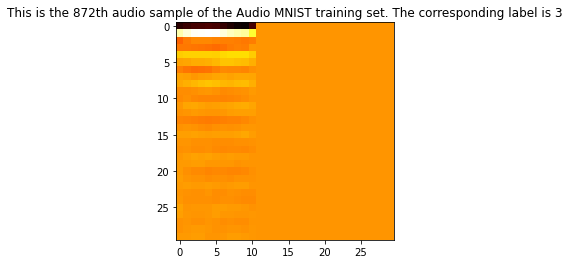

In [569]:
print("The Audio MNIST training set contains {s} samples with {p} MFC coefficients each.".format(s = audio_mnist_training_mfccs.shape[0], \
        p = audio_mnist_training_mfccs.shape[1]))

item_number = np.random.randint(low=0, high=2400)

plt.imshow(audio_mnist_training_mfccs[item_number].reshape(30, 30), cmap='hot')
plt.title("This is the {n}th audio sample of the Audio MNIST training set. The corresponding label is {l}".format( \
            n= item_number, l=int(audio_mnist_training_labels[item_number][0])))
plt.tight_layout

Use the following space to write your codes. It should be possible to reproduce results that are shown in your report with the codes that are described here. You can outsource functions into separate files if you find that this tidies up your notebook. Any additional libraries that you want to use (e.g. for visualisations etc.) can be loaded here.

### one hot vector

In [570]:
def one_hot_vector_encoding2(labels):
    #make label integer
    labels_int=labels.astype(int)
    no_of_classes = np.max(labels_int) + 1
    output = np.zeros((len(labels_int), no_of_classes))
    
    output[np.arange(len(labels_int)), labels_int] = 1
    return output

### data matrix and one hot vector of training data

In [686]:
audio_mnist_training_mfccs, _, _ = standardise(audio_mnist_training_mfccs)
MNIST_data_matrix=linear_regression_data(audio_mnist_training_mfccs)
MNIST_OHV=one_hot_vector_encoding2(audio_mnist_training_labels.reshape(len(audio_mnist_training_labels),))
### data matrix and one hot vector of training data

### data matrix and one hot vector of testing data

In [663]:
audio_mnist_test_mfccs, _, _ = standardise(audio_mnist_test_mfccs)
MNIST_data_matrix_test=linear_regression_data(audio_mnist_test_mfccs)
MNIST_OHV_test=one_hot_vector_encoding2(audio_mnist_test_labels.reshape(len(audio_mnist_test_labels),))



## multinomial linear regeression model

### traing model

In [576]:
def gradient_descent_v2_2(objective, gradient, initial_weights, 
                        step_size=1, no_of_iterations=10000,print_output=5000, tolerance=1e-3):
    # YOUR CODE HERE
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
 
    for counter in range(no_of_iterations):
        if  np.linalg.norm(gradient(weights))<=tolerance:
            print(np.linalg.norm(gradient(weights)))
            break
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+1, \
                m=no_of_iterations, o=objective_values[counter]))
           
    return weights, objective_values

In [577]:
audio_mnist_training_mfccs, _, _ = standardise(audio_mnist_training_mfccs)
MNIST_data_matrix=linear_regression_data(audio_mnist_training_mfccs)
MNIST_OHV=one_hot_vector_encoding2(audio_mnist_training_labels.reshape(len(audio_mnist_training_labels),))


MNIST_objective=lambda weight_matrix:multinomial_logistic_regression_cost_function(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV)
MNIST_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV)


MNIST_initial_weights=np.zeros((MNIST_data_matrix.shape[1], MNIST_OHV.shape[1]))

s=len(MNIST_data_matrix)

MNIST_step_size=(3.9*s)/np.linalg.norm(MNIST_data_matrix)**2
MNIST_optimal_weights_multi,MNIST_objective_values_multi=gradient_descent_v2_2(MNIST_objective, MNIST_gradient, 
                                                                     MNIST_initial_weights, 
                     MNIST_step_size, no_of_iterations=500000, print_output=5000, tolerance=1e-3)



Iteration 5000/500000, objective = 0.06304608628254402.
Iteration 10000/500000, objective = 0.03731356696918496.
Iteration 15000/500000, objective = 0.02680664015594646.
Iteration 20000/500000, objective = 0.020933515538089132.
Iteration 25000/500000, objective = 0.017159692821372093.
Iteration 30000/500000, objective = 0.014535270910263586.
Iteration 35000/500000, objective = 0.012609002924020058.
Iteration 40000/500000, objective = 0.011136629935317414.
Iteration 45000/500000, objective = 0.009975081506812998.
Iteration 50000/500000, objective = 0.009035403084563843.
Iteration 55000/500000, objective = 0.008259524766129112.
Iteration 60000/500000, objective = 0.007607979243635446.
Iteration 65000/500000, objective = 0.0070530246230266205.
Iteration 70000/500000, objective = 0.006574599022048157.
Iteration 75000/500000, objective = 0.006157838219523126.
Iteration 80000/500000, objective = 0.00579149606923672.
Iteration 85000/500000, objective = 0.005466907244431775.
Iteration 90000/50

### plot training cost

In [613]:
import matplotlib.pyplot as plt

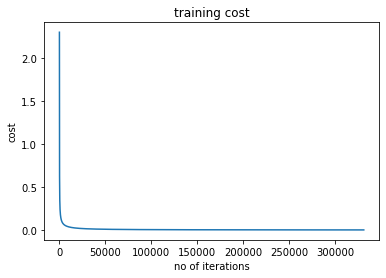

In [630]:
plt.plot(MNIST_objective_values_multi)
plt.title("training cost")
plt.xlabel("no of iterations")
plt.ylabel("cost")
plt.show()

### evaluate model for trainig data

In [580]:
MNIST_recovered_labels = multinomial_prediction_function(MNIST_data_matrix, \
                                                         MNIST_optimal_weights)
MNIST_classification_accuracy = classification_accuracy(
    audio_mnist_training_labels.reshape(len(audio_mnist_training_labels)), MNIST_recovered_labels)
print("The classification accuracy for the MNIST dataset is {p} %.".format(
    p=100 * MNIST_classification_accuracy))

The classification accuracy for the MNIST dataset is 100.0 %.


### evaluate model for test data

In [684]:
test_cost_multi=multinomial_logistic_regression_cost_function(MNIST_data_matrix_test,                                                              MNIST_optimal_weights_multi,MNIST_OHV_test)
test_cost_multi

0.21688204906697547

In [685]:
MNIST_recovered_labels_test = multinomial_prediction_function(MNIST_data_matrix_test,MNIST_optimal_weights_multi)

MNIST_classification_accuracy_test = classification_accuracy(
    audio_mnist_test_labels.reshape(len(audio_mnist_test_labels)), MNIST_recovered_labels_test)

print("The classification accuracy test for the MNIST dataset is {p} %.".format(
    p=100 * MNIST_classification_accuracy_test))

The classification accuracy test for the MNIST dataset is 95.16666666666667 %.


### K-fold split

In [584]:
def KFold_split(data_size, K):
    np.random.seed(StudentID)
    #BEGIN SOLUTION
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split

## Ridge

In [681]:
def ridge_multinomial_logistic_regression_cost_function(data_matrix,
                                                        weight_matrix,OHV,regularisation_parameter):
    # YOUR CODE HERE
    rL=multinomial_logistic_regression_cost_function(data_matrix,weight_matrix,OHV)+\
      (regularisation_parameter/2)*(np.linalg.norm(weight_matrix)**2)
    
    return rL

In [586]:
def ridge_multinomial_logistic_regression_gradient(data_matrix,
                                                        weight_matrix,OHV,regularisation_parameter):
    # YOUR CODE HERE
    rgL=multinomial_logistic_regression_gradient(data_matrix,weight_matrix,OHV)+regularisation_parameter*weight_matrix
    
    return rgL

In [587]:
MNIST_ridge_regularisation_parameter = 1e-3


MNIST_ridge_objective=lambda weight_matrix:ridge_multinomial_logistic_regression_cost_function(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV,MNIST_ridge_regularisation_parameter)
MNIST_ridge_gradient=lambda weight_matrix:ridge_multinomial_logistic_regression_gradient(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV,MNIST_ridge_regularisation_parameter) 
                                                                           


MNIST_initial_weights=np.zeros((MNIST_data_matrix.shape[1], MNIST_OHV.shape[1]))

s=MNIST_data_matrix.shape[0]
MNIST_ridge_step_size=(3.9*s)/np.linalg.norm(MNIST_data_matrix)**2

MNIST_ridge_optimal_weights,MNIST_ridge_objective_values=gradient_descent_v2_2(MNIST_ridge_objective, MNIST_ridge_gradient, 
                                                                       MNIST_initial_weights, 
                     MNIST_ridge_step_size, no_of_iterations=500000, tolerance=1e-3)





Iteration 5000/500000, objective = 0.06982101801182208.
Iteration 10000/500000, objective = 0.04683988104574291.
Iteration 15000/500000, objective = 0.03826084517079045.
Iteration 20000/500000, objective = 0.03387938983600853.
Iteration 25000/500000, objective = 0.031311232569378344.
Iteration 30000/500000, objective = 0.02968589144408997.
Iteration 35000/500000, objective = 0.028603297533546762.
Iteration 40000/500000, objective = 0.027854077070845897.
Iteration 45000/500000, objective = 0.02731969304064427.
Iteration 50000/500000, objective = 0.026929087696600643.
Iteration 55000/500000, objective = 0.02663768160183789.
Iteration 60000/500000, objective = 0.02641644956761384.
Iteration 65000/500000, objective = 0.026245906121312945.
Iteration 70000/500000, objective = 0.0261126316619777.
Iteration 75000/500000, objective = 0.026007182723031267.
Iteration 80000/500000, objective = 0.025922790412791795.
Iteration 85000/500000, objective = 0.025854525197775854.
Iteration 90000/500000, o

### plot training cost

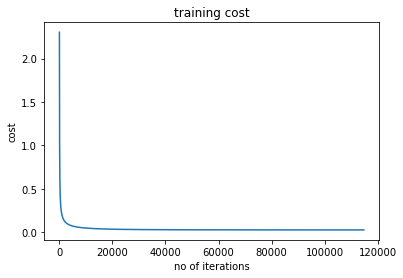

In [632]:
plt.plot(MNIST_ridge_objective_values)
plt.title("training cost")
plt.xlabel("no of iterations")
plt.ylabel("cost")
plt.show()

### evaluate model for trainig data

In [588]:
ridge_recovered_labels = multinomial_prediction_function(MNIST_data_matrix, \
                                                         MNIST_ridge_optimal_weights)
ridge_classification_accuracy = classification_accuracy(
    audio_mnist_training_labels.reshape(len(audio_mnist_training_labels)), ridge_recovered_labels)

print("The classification accuracy for the MNIST dataset is {p} %.".format(
    p=100 * ridge_classification_accuracy))

The classification accuracy for the MNIST dataset is 100.0 %.


### evaluate model for test data

In [689]:
test_cost_ridge=ridge_multinomial_logistic_regression_cost_function(MNIST_data_matrix_test,
                                                              MNIST_ridge_optimal_weights,MNIST_OHV_test,1e-3)
test_cost_ridge

0.19568978118425745

In [699]:
ridge_recovered_labels_test = multinomial_prediction_function(MNIST_data_matrix_test,MNIST_ridge_optimal_weights)

ridge_classification_accuracy_test = classification_accuracy(
    audio_mnist_test_labels.reshape(len(audio_mnist_test_labels)), ridge_recovered_labels_test)

print("The ridge classification accuracy test for the MNIST dataset is {p} %.".format(
    p= 100*ridge_classification_accuracy_test))

The ridge classification accuracy test for the MNIST dataset is 94.83333333333334 %.


### hyper-paremeter tuning

In [601]:
def KFold_cross_validation_ridge(data_matrix, data_outputs, K, r_parameter):
    
    data_size = len(data_matrix)
    indexes_split = KFold_split(data_size, K)
    obj_value = []
    
    
    for i in range(K):
        indexes = np.concatenate(
            [indexes_split[j] for j in range(K) if (j != i)])  
        
        data_train=data_matrix[indexes]
        label_train=data_outputs[indexes]
        
        data_val=data_matrix[indexes_split[i]]
        label_val=data_outputs[indexes_split[i]]


        ridge_objective_t=lambda weight_matrix:ridge_multinomial_logistic_regression_cost_function(data_train,
                                                                           weight_matrix,label_train,r_parameter)
        ridge_gradient_t=lambda weight_matrix:ridge_multinomial_logistic_regression_gradient(data_train,
                                                                           weight_matrix,label_train,r_parameter) 
    
        ridge_objective_v=lambda weight_matrix:ridge_multinomial_logistic_regression_cost_function(data_val,
                                                                           weight_matrix,label_val,r_parameter)
        ridge_gradient_v=lambda weight_matrix:ridge_multinomial_logistic_regression_gradient(data_val,
                                                                           weight_matrix,label_val,r_parameter) 
   

        initial_weights=np.zeros((data_train.shape[1], label_train.shape[1]))

        s_t=data_train.shape[0]
        ridge_step_size_t=(3.9*s_t)/np.linalg.norm(data_train)**2 
        
   
        weights_train=gradient_descent_v2_2(ridge_objective_t, ridge_gradient_t, 
                                                                initial_weights, 
                     ridge_step_size_t, no_of_iterations=30000, tolerance=1e-2)[0]
    
        value_val=ridge_objective_v(weights_train)
        
        obj_value.append(value_val)
        print(value_val)
    objective_value=np.mean(obj_value)
    return objective_value

In [602]:
K_objective_function_ridge=lambda alpha: KFold_cross_validation_ridge(data_matrix=MNIST_data_matrix, 
                                                                      data_outputs=MNIST_OHV, K=5, r_parameter=alpha)

In [603]:
#grid search with 5-fold cross validation
alpha_grid=np.array([0,1e-4,1e-3,1e-2])
grid_search(K_objective_function_ridge, alpha_grid) 

Iteration 5000/400000, objective = 0.059425555327051224.
Iteration 10000/400000, objective = 0.034350398133151404.
Iteration 15000/400000, objective = 0.024246335099418884.
Iteration 20000/400000, objective = 0.018719221630080957.
Iteration 25000/400000, objective = 0.015245911096277898.
0.009999740823157487
Iteration completed after 28616/400000, objective = 0.01344641515619636.
0.10274608409452728
Iteration 5000/400000, objective = 0.060327341470849526.
Iteration 10000/400000, objective = 0.03483231873456846.
Iteration 15000/400000, objective = 0.0245642049991064.
Iteration 20000/400000, objective = 0.018938020651079045.
Iteration 25000/400000, objective = 0.01540078366214364.
0.009999811813370833
Iteration completed after 29205/400000, objective = 0.013312078938844183.
0.13063781316271644
Iteration 5000/400000, objective = 0.05583790990152494.
Iteration 10000/400000, objective = 0.03153412930752386.
Iteration 15000/400000, objective = 0.021957074393189724.
Iteration 20000/400000, ob

0.0

## LASSO

In [604]:
def proximal_gradient_descent2(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=500000,
                              print_output=5000,
                              tolerance=1e-3):
    # YOUR CODE HERE
    objective_values = []
    weights = initial_weights 
    objective_values.append(objective(weights)) 
    
    for counter in range(no_of_iterations):
        if  np.linalg.norm(gradient(weights))<=tolerance:
            print(np.linalg.norm(gradient(weights)))
            break
        weights = proximal_map(weights - step_size * gradient(weights))
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In [605]:
MNIST_LASSO_regularisation_parameter = 1e-3


MNIST_LASSO_objective=lambda weight_matrix:lasso_logistic_regression_cost_function(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV,MNIST_LASSO_regularisation_parameter)
MNIST_LASSO_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(MNIST_data_matrix,
                                                                           weight_matrix,MNIST_OHV) 
                                                                           


MNIST_initial_weights=np.zeros((MNIST_data_matrix.shape[1], MNIST_OHV.shape[1]))

s=MNIST_data_matrix.shape[0]
MNIST_LASSO_step_size=(3.9*s)/np.linalg.norm(MNIST_data_matrix)**2

MNIST_LASSO_threshold  = MNIST_LASSO_regularisation_parameter * MNIST_LASSO_step_size
MNIST_proximal_map =  lambda x: soft_thresholding(x, MNIST_LASSO_threshold)

MNIST_LASSO_optimal_weights,MNIST_LASSO_objective_values=proximal_gradient_descent2(MNIST_LASSO_objective, MNIST_LASSO_gradient, 
                                                                       MNIST_proximal_map,
                                                                       MNIST_initial_weights,
                                                                       MNIST_LASSO_step_size,
                                                                       no_of_iterations=500000, print_output=5000, 
                                                                       tolerance=1e-3)



Iteration 5000/500000, objective = 0.25341855969882293.
Iteration 10000/500000, objective = 0.23651276861627007.
Iteration 15000/500000, objective = 0.2287818485646457.
Iteration 20000/500000, objective = 0.22395633895531278.
Iteration 25000/500000, objective = 0.22064037864562236.
Iteration 30000/500000, objective = 0.2181775891906802.
Iteration 35000/500000, objective = 0.21626636879458164.
Iteration 40000/500000, objective = 0.21471442674041336.
Iteration 45000/500000, objective = 0.2134277174717109.
Iteration 50000/500000, objective = 0.21234449701042085.
Iteration 55000/500000, objective = 0.21142956415445052.
Iteration 60000/500000, objective = 0.21064021096205082.
Iteration 65000/500000, objective = 0.20995014390167255.
Iteration 70000/500000, objective = 0.2093440174618259.
Iteration 75000/500000, objective = 0.20880204144810346.
Iteration 80000/500000, objective = 0.20831811742496154.
Iteration 85000/500000, objective = 0.20788170269210154.
Iteration 90000/500000, objective = 

### plot training cost

evaluate by trainig data 

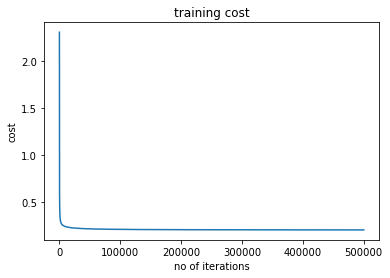

In [631]:
plt.plot(MNIST_LASSO_objective_values)
plt.title("training cost")
plt.xlabel("no of iterations")
plt.ylabel("cost")
plt.show()

### evaluate model for trainig data

In [606]:
LASSO_recovered_labels = multinomial_prediction_function(MNIST_data_matrix, \
                                                         MNIST_LASSO_optimal_weights)
LASSO_classification_accuracy = classification_accuracy(
    audio_mnist_training_labels.reshape(len(audio_mnist_training_labels)), MNIST_recovered_labels)

print("The classification accuracy for the MNIST dataset is {p} %.".format(
    p=100 * LASSO_classification_accuracy))

The classification accuracy for the MNIST dataset is 100.0 %.


In [675]:
test_cost_lasso=lasso_logistic_regression_cost_function(MNIST_data_matrix_test,
                                                              MNIST_LASSO_optimal_weights,MNIST_OHV_test,1e-3)
test_cost_lasso

0.40028758027352385

In [676]:
LASSO_recovered_labels_test = multinomial_prediction_function(MNIST_data_matrix_test,MNIST_LASSO_optimal_weights)

LASSO_classification_accuracy_test = classification_accuracy(
    audio_mnist_test_labels.reshape(len(audio_mnist_test_labels)), LASSO_recovered_labels_test)

print("The LASSO classification accuracy test for the MNIST dataset is {p} %.".format(
    p=100 * LASSO_classification_accuracy_test))

The LASSO classification accuracy test for the MNIST dataset is 93.5 %.


### hyper-paremeter tuning

In [636]:
def KFold_cross_validation_LASSO(data_matrix, data_outputs, K, r_parameter):
    
    data_size = len(data_matrix)
    indexes_split = KFold_split(data_size, K)
    
    
    obj_value = []

    
    for i in range(K):
        indexes = np.concatenate(
            [indexes_split[j] for j in range(K) if (j != i)])  
        
        data_train=data_matrix[indexes]
        label_train=data_outputs[indexes]
        
        data_val=data_matrix[indexes_split[i]]
        label_val=data_outputs[indexes_split[i]]


        LASSO_objective_t=lambda weight_matrix:lasso_logistic_regression_cost_function(data_train,
                                                                           weight_matrix,label_train,r_parameter)
        LASSO_gradient_t=lambda weight_matrix:multinomial_logistic_regression_gradient(data_train,
                                                                           weight_matrix,label_train) 
    
        LASSO_objective_v=lambda weight_matrix:lasso_logistic_regression_cost_function(data_val,
                                                                           weight_matrix,label_val,r_parameter)
        LASSO_gradient_v=lambda weight_matrix:multinomial_logistic_regression_gradient(data_val,
                                                                           weight_matrix,label_val) 
   

        initial_weights=np.zeros((data_train.shape[1], label_train.shape[1]))

        s_t=data_train.shape[0]
        LASSO_step_size_t=(3.9*s_t)/np.linalg.norm(data_train)**2

        LASSO_threshold_t  = r_parameter * LASSO_step_size_t
        proximal_map_t =  lambda x: soft_thresholding(x, LASSO_threshold_t)

    
        s_v=data_val.shape[0]
        LASSO_step_size_v=(3.9*s_v)/np.linalg.norm(data_val)**2

        LASSO_threshold_v  = r_parameter * LASSO_step_size_v
        proximal_map_v =  lambda x: soft_thresholding(x, LASSO_threshold_v)
   
        weights_train=proximal_gradient_descent2(LASSO_objective_t, LASSO_gradient_t, 
                                                    proximal_map_t,
                                                    initial_weights,
                                                    LASSO_step_size_t,
                                                    no_of_iterations=30000, 
                                                    tolerance=1e-2)[0]
        
        #weights_val = proximal_map_v(weights_train - LASSO_step_size_v* LASSO_gradient_v(weights_train))
        value_val=LASSO_objective_v(weights_train)
   
        #optimal_weights += weights_val / K
        obj_value.append(value_val)\
        print(value_val)
    objective_value=np.mean(obj_value)
    return objective_value
                                 

In [637]:
K_objective_function_LASSO=lambda alpha: KFold_cross_validation_LASSO(data_matrix=MNIST_data_matrix, data_outputs=MNIST_OHV,
                                                                      K=5, r_parameter=alpha)

In [638]:
#grid search with 5-cross validation
#it takes about 1.5 hour
alpha_grid=np.array([0,1e-4,1e-3,1e-2])
grid_search(K_objective_function_LASSO, alpha_grid) 

Iteration 5000/30000, objective = 0.059425555327051224.
Iteration 10000/30000, objective = 0.034350398133151404.
Iteration 15000/30000, objective = 0.024246335099418884.
Iteration 20000/30000, objective = 0.018719221630080957.
Iteration 25000/30000, objective = 0.015245911096277898.
0.009999740823157487
Iteration completed after 28616/30000, objective = 0.01344641515619636.
0.10274608409452728
Iteration 5000/30000, objective = 0.060327341470849526.
Iteration 10000/30000, objective = 0.03483231873456846.
Iteration 15000/30000, objective = 0.0245642049991064.
Iteration 20000/30000, objective = 0.018938020651079045.
Iteration 25000/30000, objective = 0.01540078366214364.
0.009999811813370833
Iteration completed after 29205/30000, objective = 0.013312078938844183.
0.13063781316271644
Iteration 5000/30000, objective = 0.05583790990152494.
Iteration 10000/30000, objective = 0.03153412930752386.
Iteration 15000/30000, objective = 0.021957074393189724.
Iteration 20000/30000, objective = 0.0167

0.0

In [623]:
#it took over 10 hours for 400000 iterations

Iteration 5000/400000, objective = 0.059425555327051224.
Iteration 10000/400000, objective = 0.034350398133151404.
Iteration 15000/400000, objective = 0.024246335099418884.
Iteration 20000/400000, objective = 0.018719221630080957.
Iteration 25000/400000, objective = 0.015245911096277898.
0.009999740823157487
Iteration completed after 28616/400000, objective = 0.01344641515619636.
0.10274608409452728
Iteration 5000/400000, objective = 0.060327341470849526.
Iteration 10000/400000, objective = 0.03483231873456846.
Iteration 15000/400000, objective = 0.0245642049991064.
Iteration 20000/400000, objective = 0.018938020651079045.
Iteration 25000/400000, objective = 0.01540078366214364.
0.009999811813370833
Iteration completed after 29205/400000, objective = 0.013312078938844183.
0.13063781316271644
Iteration 5000/400000, objective = 0.05583790990152494.
Iteration 10000/400000, objective = 0.03153412930752386.
Iteration 15000/400000, objective = 0.021957074393189724.
Iteration 20000/400000, ob

Iteration 260000/400000, objective = 0.1972260950835002.
Iteration 265000/400000, objective = 0.1971671091814113.
Iteration 270000/400000, objective = 0.19711023911642067.
Iteration 275000/400000, objective = 0.19705521650016378.
Iteration 280000/400000, objective = 0.19700202151756882.
Iteration 285000/400000, objective = 0.19695036638876093.
Iteration 290000/400000, objective = 0.19690022046523678.
Iteration 295000/400000, objective = 0.19685177441046414.
Iteration 300000/400000, objective = 0.1968044889466894.
Iteration 305000/400000, objective = 0.1967585042580535.
Iteration 310000/400000, objective = 0.19671419674593438.
Iteration 315000/400000, objective = 0.19667088718581305.
Iteration 320000/400000, objective = 0.19662865750151626.
Iteration 325000/400000, objective = 0.196587615048825.
Iteration 330000/400000, objective = 0.1965477544747777.
Iteration 335000/400000, objective = 0.19650934328331496.
Iteration 340000/400000, objective = 0.19647205149648186.
Iteration 345000/4000

Iteration 160000/400000, objective = 0.1967045999364131.
Iteration 165000/400000, objective = 0.19656956813441878.
Iteration 170000/400000, objective = 0.19644120683886493.
Iteration 175000/400000, objective = 0.19631889337901784.
Iteration 180000/400000, objective = 0.19620190504012763.
Iteration 185000/400000, objective = 0.19608955774227055.
Iteration 190000/400000, objective = 0.19598318774864534.
Iteration 195000/400000, objective = 0.19588159830257873.
Iteration 200000/400000, objective = 0.1957835781301679.
Iteration 205000/400000, objective = 0.19568935840338886.
Iteration 210000/400000, objective = 0.19559855010321384.
Iteration 215000/400000, objective = 0.19551057707935365.
Iteration 220000/400000, objective = 0.1954261554937129.
Iteration 225000/400000, objective = 0.19534569876353983.
Iteration 230000/400000, objective = 0.19526756187549527.
Iteration 235000/400000, objective = 0.1951930343861267.
Iteration 240000/400000, objective = 0.19512074944904612.
Iteration 245000/4

Iteration 60000/400000, objective = 0.20647489906853905.
Iteration 65000/400000, objective = 0.205751712457157.
Iteration 70000/400000, objective = 0.20510485542735477.
Iteration 75000/400000, objective = 0.20453431637647213.
Iteration 80000/400000, objective = 0.2040257756582212.
Iteration 85000/400000, objective = 0.20356840611545463.
Iteration 90000/400000, objective = 0.20315227233256425.
Iteration 95000/400000, objective = 0.20277724415553278.
Iteration 100000/400000, objective = 0.20243435420193118.
Iteration 105000/400000, objective = 0.20211855124873193.
Iteration 110000/400000, objective = 0.2018262359247276.
Iteration 115000/400000, objective = 0.2015528031800542.
Iteration 120000/400000, objective = 0.20129664696457306.
Iteration 125000/400000, objective = 0.20105697954117083.
Iteration 130000/400000, objective = 0.20083437180754515.
Iteration 135000/400000, objective = 0.20062908181325428.
Iteration 140000/400000, objective = 0.20043617441551353.
Iteration 145000/400000, ob

Iteration 370000/400000, objective = 0.9124653666684632.
Iteration 375000/400000, objective = 0.9124633751239144.
Iteration 380000/400000, objective = 0.9124614571730625.
Iteration 385000/400000, objective = 0.9124596312278344.
Iteration 390000/400000, objective = 0.9124579257422993.
Iteration 395000/400000, objective = 0.912456285861088.
Iteration 400000/400000, objective = 0.9124547238765383.
Iteration completed after 400000/400000, objective = 0.9124547238765383.
0.997312237512917
Iteration 5000/400000, objective = 0.9437544153350292.
Iteration 10000/400000, objective = 0.9289619720369598.
Iteration 15000/400000, objective = 0.9228689520413651.
Iteration 20000/400000, objective = 0.91956360662009.
Iteration 25000/400000, objective = 0.91757617953273.
Iteration 30000/400000, objective = 0.916237830796172.
Iteration 35000/400000, objective = 0.9152741957372632.
Iteration 40000/400000, objective = 0.9145245451554007.
Iteration 45000/400000, objective = 0.9139242382403745.
Iteration 500

KeyboardInterrupt: 

Specify the code for your best data model (linear, polynomial or else) applied to your best weights
and assign the result to the output of the function $\mathtt{MNIST\_model\_function}$. The data model has to be created from the argument *inputs*, which is a two-dimensional array where the first dimension equals the number of samples and the second dimension the dimension of the data (900 in case of Audio MNIST). If, for example, your model is a linear basis model applied to a weight matrix *best_weight_matrix*, then your code could look like:

```
def MNIST_model_function(inputs):
    return linear_regression_data(inputs) @ best_weight_matrix
```


In [661]:
'''Specify your model function. The output has to be a two-dimensional array of size sx1
You are not allowed to include additional input arguments.'''

#multinomial logistic regression is the best

def MNIST_model_function(inputs):
    # YOUR CODE HERE
    standard_data, _, _ = standardise(inputs)
    standard_data_matrix=linear_regression_data(standard_data)
    best_weight_matrix=MNIST_optimal_weights_multi
    labels=multinomial_prediction_function(standard_data_matrix,best_weight_matrix)
    return labels



The code in the next cell will then evaluate the classification performance of your best classifier
when applied to hidden data that is similar (but different) to the MNIST training dataset.

In [662]:
# YOUR CODE HERE
audio_mnist_test_mfccs = np.genfromtxt(
    'AudioMNIST/MFCC/Testing/testing_mfccs.txt')
predicted_label=MNIST_model_function(audio_mnist_test_mfccs)

classification_accuracy_test = classification_accuracy(
    audio_mnist_test_labels.reshape(len(audio_mnist_test_labels)), predicted_label)

print("The best accuracy is "+str(classification_accuracy_test*100)+"%")

The best accuracy is 95.16666666666667%


## Problem 2: Music genre classification
This concludes the binary classification part of the final assessment. We now move on to multinomial logistic regression for multi-class classfication problems. We later apply this to another sound classification problem, namely to a classification of music by genres.

### Question 2a [7 marks]
As in the first exercise, implement the softmax function $\mathtt{softmax\_function}$ as defined in the lectures. The function takes the NumPy array argument as its main argument, but also has an optional *axis* argument to determine across which array-dimension you apply the softmax operation. If this argument is not specified (or set to None), then the softmax operation is applied to the entire array. Make sure your function works at least for NumPy arrays *argument* with arbitrary numerical values and dimension one or two.

In [270]:
def softmax_function(argument, axis=None):
    # YOUR CODE HERE
    if axis == None:
        output = np.exp(argument - np.max(argument))
        output = output / np.sum(output)
    else:
        output = np.exp(argument - np.expand_dims(np.max(argument, axis), axis))
        output = output / np.expand_dims(np.sum(output, axis), axis)
    return output


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [271]:
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5], [0.3], [-3.7]])), np.array([[0.76528029], \
                                                        [0.23049799], [0.00422172]]))
np.testing.assert_array_almost_equal(softmax_function(np.array([[1.5, 3], [0.3, -0.7], [-3.7, 2]]), axis=0), \
                          np.array([[0.76528029, 0.71807976], [0.23049799, 0.01775346], \
                                    [0.00422172, 0.26416678]]))

At the next stage write a function $\mathtt{multinomial\_prediction\_function}$ that turns your predicitons into labels. The function takes the arguments *data_matrix* and *weight_matrix* as inputs and returns a column-vector of labels with values in  $\left\{0, K-1\right\}$ as its output, where $K$ is the number of classes.

In [272]:
def multinomial_prediction_function(data_matrix, weight_matrix):
    # YOUR CODE HERE
    return np.argmax(data_matrix@weight_matrix, axis=1)

Next, write a function $\mathtt{one\_hot\_vector\_encoding}$ that converts an NumPy array labels with values in the range of $\left\{0,K-1\right\}$  into so-called one-hot vector encodings. For example, for  $K=3$  and a label vector  $\mathtt{labels} = (2\,0\,1\,2)^\top$, the output of $\mathtt{one\_hot\_vector\_encoding}(\mathit{labels})$ should be a two-dimensional NumPy array of the form:
$$
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
$$

In [273]:
def one_hot_vector_encoding(labels):
    # YOUR CODE HERE
    no_of_classes = np.max(labels) + 1
    output = np.zeros((len(labels), no_of_classes))
    output[np.arange(len(labels)), labels] = 1
    return output


Test your function with the following unit test. Passing the test will be awarded with **1 mark**.

In [274]:
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1, 2, 0, 3])), \
                          np.array([[0,1,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]))
np.testing.assert_array_almost_equal(one_hot_vector_encoding(np.array([1,0,1,0])), \
                          np.array([[0,1],[1,0],[0,1],[1,0]]))

Implement the cost function and gradient for the multinomial logistic regression in terms of two functions $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ and $\mathtt{multinomial\_logistic\_regression\_gradient}$. As in the binary classification case, the arguments are the  data matrix *data_matrix* and *weights* that are now named *weight_matrix*. Instead of passing on labels as data_labels as in the binary case, you pass the one hot vector encoding representation *one_hot_vector_encodings* as your third argument. Return the cost function value, respectively the gradient, following the mathematical formulas in the lecture notes.

**Remark**: both functions should include a normalisation prefactor $\frac{1}{s}$.

In [275]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                                  one_hot_vector_encodings):
    # YOUR CODE HERE
    s=len(data_matrix)
    model_evaluation =linear_model_function(data_matrix,weight_matrix)
    return (1/s)*np.sum(np.log(np.sum(np.exp(model_evaluation),axis=1)) - np.sum(one_hot_vector_encodings * \
                                                                                model_evaluation,axis=1))

In [276]:
def multinomial_logistic_regression_gradient(data_matrix, weight_matrix,
                                             one_hot_vector_encodings):
    # YOUR CODE HERE
    s=len(data_matrix)
    model_evaluation = linear_model_function(data_matrix, weight_matrix)
    return (1/s)*data_matrix.T @ (softmax_function(model_evaluation, axis=1) - one_hot_vector_encodings)

Test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [277]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_cost_function(
        test_data_matrix, test_weight_matrix, test_one_hot_vector_encoding),
    0.028611)

In [278]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
np.testing.assert_array_almost_equal(
    multinomial_logistic_regression_gradient(test_data_matrix,
                                             test_weight_matrix,
                                             test_one_hot_vector_encoding),
    np.array([[2.346197e-02, 2.407665e-12, -2.671137e-02, 3.249397e-03],
              [4.692401e-02, 4.815311e-12, -5.320063e-02, 6.276617e-03],
              [1.876966e-01, 1.926122e-11, -2.129506e-01, 2.525396e-02]]))

We now proceed with loading the data. The GTZAN genre collection dataset was collected in $2000-2001$. It consists of $1000$ audio files each having $30$ seconds duration. There are $10$ classes ($10$ music genres) each containing $100$ audio tracks. Each track is in **.wav** format. It contains audio files of the following 10 genres:

- Blues
- Classical
- Country
- Disco
- Hip-hop
- Jazz
- Metal
- Pop
- Reggae
- Rock

The original raw dataset can be found for example at [GTZAN dataset.](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification) Instead of working with raw audio files, we will work with the dataset containing a number, $58$ in total, of audio file features evaluated for each file of the dataset. This file is provided together with this template. In the next cell we read and then normalise the data provided.

In [279]:
GTZAN_data = np.genfromtxt('GTZAN_features.csv',
                           skip_header=True,
                           dtype=float,
                           delimiter=',',
                           usecols=range(1, 59))
GTZAN_data, _, _ = standardise(GTZAN_data)

genres_dictionary = {b'blues':0,b'classical':1,b'country':2,\
                    b'disco':3,b'hiphop':4,b'jazz':5,\
                     b'metal':6,b'pop':7,b'reggae':8,b'rock':9}
GTZAN_labels = np.genfromtxt('GTZAN_features.csv',
                             skip_header=True,
                             dtype=str,
                             delimiter=',',
                             usecols=[59],
                             converters={59: lambda x: genres_dictionary[x]})

You are now asked to apply the above to the GTZAN dataset:
- Define a linear regression data matrix corresponding to GTZAN data. Store the matrix as *GTZAN_data_matrix*. Define a one hot vector encoding of GTZAN labels and store the result in as *GTZAN_OHV*;
- Define an objective lambda function $\mathtt{GTZAN\_objective}$ with the argument *weight_matrix* based on the $\mathtt{multinomial\_logistic\_regression\_cost\_function}$ with fixed arguments *data_matrix* (equal to *GTZAN_data_matrix*) and *data_labels* (equal to *GTZAN_OHV*). Repeat the same exercise to create a function $\mathtt{GTZAN\_gradient}$ based on $\mathtt{multinomial\_logistic\_regression\_gradient}$;
- Define the starting point of the gradient descent as a zero matrix of appropriate dimensions and store it as *GTZAN_initial_weights*;
- Define the step-size of the gradient descent as 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Store it as *GTZAN_step_size*;
- Evaluate the optimal weights by running the gradient descent in the second variation ($\mathtt{gradient\_descent\_v2}$) using the above parameters and *tolerance = 1e-3*, *no_of_iterations = 1000*;
- Store the result of the gradient descent as *GTZAN_optimal_weights*, *GTZAN_objective_values*.

In [281]:
# YOUR CODE HERE
GTZAN_data_matrix=linear_regression_data(GTZAN_data)
GTZAN_OHV=one_hot_vector_encoding(GTZAN_labels)

GTZAN_objective=lambda weight_matrix:multinomial_logistic_regression_cost_function(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV)
GTZAN_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV)


GTZAN_initial_weights=np.zeros((GTZAN_data_matrix.shape[1], GTZAN_OHV.shape[1]))

s=len(GTZAN_data_matrix)
GTZAN_step_size=(3.9*s)/np.linalg.norm(GTZAN_data_matrix)**2
GTZAN_optimal_weights,GTZAN_objective_values=gradient_descent_v2(GTZAN_objective, GTZAN_gradient, 
                                                                     GTZAN_initial_weights, 
                      GTZAN_step_size, no_of_iterations=1000, print_output=100, tolerance=1e-3)



Iteration 100/1000, objective = 1.0767506389614987.
Iteration 200/1000, objective = 0.9109814848675098.
Iteration 300/1000, objective = 0.8244841216515572.
Iteration 400/1000, objective = 0.7683732070923381.
Iteration 500/1000, objective = 0.7279186772726314.
Iteration 600/1000, objective = 0.696821183120303.
Iteration 700/1000, objective = 0.6718623190153219.
Iteration 800/1000, objective = 0.6512000503453522.
Iteration 900/1000, objective = 0.6336912713100297.
Iteration 1000/1000, objective = 0.6185821006106673.
Iteration completed after 1000/1000, objective = 0.6185821006106673.


Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

In [285]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_optimal_weights),
                               6.581158794776621)

In [286]:
np.testing.assert_almost_equal(GTZAN_objective_values[-1], 0.6184412193103139)

In [287]:
GTZAN_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, \
                                                         GTZAN_optimal_weights)
GTZAN_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_classification_accuracy))

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.


In [288]:
np.testing.assert_almost_equal(GTZAN_classification_accuracy, 0.819)

### Question 2b [7 marks]
As a final exercise before you are left to continue with the main part of your project of classifying
spoken digits, implement a modification of the multinomial logistic regression problem that
contains a positive multiple of the one-norm of the weight matrix as regularisation term, and
approximate a solution numerically with the proximal gradient descent method as introduced in
the lectures. 

Begin by completing the following three functions. 
- The function $\mathtt{soft\_thresholding}$ takes the
two arguments *argument* and *threshold* and returns the solution of the soft-thresholding operation
applied to *argument* with threshold *threshold*.
- The function $\mathtt{lasso\_logistic\_regression\_cost\_function}$ is supposed to implement the multinomial
logistic regression loss with additional one-norm regularisation of weights for data
matrix *data_matrix*, weight matrix *weight_matrix*, the one hot vector encoding of labels 
*one_hot_vector_encodings* and the regularisation parameter *regularisation_parameter*.
- The function $\mathtt{proximal\_gradient\_descent}$ takes the same arguments as the function $\mathtt{gradient\_descent}$, with additional argument $\mathtt{proximal\_map}$ in order to specify the proximal map to be used.

In [289]:
def soft_thresholding(argument, threshold):
    # YOUR CODE HERE
    
    return np.sign(argument) * np.maximum(0, np.abs(argument) - threshold)
 

In [290]:
def lasso_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings,
                                            regularisation_parameter):
    # YOUR CODE HERE
    return multinomial_logistic_regression_cost_function(data_matrix, weight_matrix,
                                            one_hot_vector_encodings)\
                                            +regularisation_parameter*np.sum(np.abs(weight_matrix))

In [291]:
def proximal_gradient_descent(objective,
                              gradient,
                              proximal_map,
                              initial_weights,
                              step_size=1,
                              no_of_iterations=1000,
                              print_output=100):
    # YOUR CODE HERE
    objective_values = []
    weights = initial_weights 
    objective_values.append(objective(weights)) 
    
    for counter in range(no_of_iterations):
        weights = proximal_map(weights - step_size * gradient(weights))
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

Now test your functions with the following unit tests. Passing each test will be awarded with **1 mark**.

In [292]:
test_weight_matrix = np.array([[1, 2], [3, -4]])
np.testing.assert_array_almost_equal(soft_thresholding(test_weight_matrix, 2),
                                     np.array([[0, 0], [1, -2]]))

In [293]:
test_data_matrix = np.array([[6, 4, 5], [1, 2, 8], [-3, 3, 6], [6, 5, -100],
                             [5, 7, 2]])
test_weight_matrix = np.array([[2, 1, -2, -4], [2, -5, 1, 4], [-2, -3, -1,
                                                               -2]])
test_one_hot_vector_encoding = np.array([[1., 0., 0., 0.], [0., 0., 1., 0.],
                                         [0., 0., 0., 1.], [0., 1., 0., 0.],
                                         [1., 0., 0., 0.]])
test_regularisation_parameter = 0.1
np.testing.assert_almost_equal(
    lasso_logistic_regression_cost_function(test_data_matrix,
                                            test_weight_matrix,
                                            test_one_hot_vector_encoding,
                                            test_regularisation_parameter),
    2.9286110286783553)

In [294]:
lasso_logistic_regression_cost_function(test_data_matrix,
                                            test_weight_matrix,
                                            test_one_hot_vector_encoding,
                                            test_regularisation_parameter)==2.9286110286783553

True

In the next cell, define a suitable objective function *GTZAN_LASSO_objective* and a suitable gradient function *GTZAN_LASSO_gradient*, both with argument *weight_matrix* and fixed *data_matrix* (equal to *GTZAN_data_matrix*) and *one_hot_vector_encodings* (equal to *GTZAN_OHV*) from the GTZAN dataset that you have used before, as well as a suitable proximal map function *GTZAN_proximal_map* with correctly chosen threshold. The threshold should be equal to the regularisation parameter multiplied by the gradient descent step-size. Take the step size equal to 
$$
\tau = \frac{3.9\cdot s}{\left\|\mathbf{\Phi\left(X\right)}\right\|^2},
$$
where $s$ is the number of data samples and $\mathbf{\Phi\left(X\right)}$ is a mathematical representation of the *GTZAN_data_matrix*. Take the regularisation parameter equal to
$$
\alpha = 1e-4.
$$

In [295]:
LASSO_regularisation_parameter = 1e-4
# YOUR CODE HERE

GTZAN_LASSO_objective=lambda weight_matrix:lasso_logistic_regression_cost_function(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV,LASSO_regularisation_parameter)
GTZAN_LASSO_gradient=lambda weight_matrix:multinomial_logistic_regression_gradient(GTZAN_data_matrix,
                                                                           weight_matrix,GTZAN_OHV) 
                                                                           


GTZAN_initial_weights=np.zeros((GTZAN_data_matrix.shape[1], GTZAN_OHV.shape[1]))

s=GTZAN_data_matrix.shape[0]
LASSO_step_size=(3.9*s)/np.linalg.norm(GTZAN_data_matrix)**2

LASSO_threshold  = LASSO_regularisation_parameter*LASSO_step_size
GTZAN_proximal_map =  lambda x: soft_thresholding(x, LASSO_threshold)

GTZAN_LASSO_optimal_weights,GTZAN_LASSO_objective_values=proximal_gradient_descent(GTZAN_LASSO_objective, GTZAN_LASSO_gradient, 
                                                                       GTZAN_proximal_map,
                                                                       GTZAN_initial_weights,
                                                                       LASSO_step_size)



Iteration 100/1000, objective = 1.0825816929822873.
Iteration 200/1000, objective = 0.9188065638028398.
Iteration 300/1000, objective = 0.8337438517624023.
Iteration 400/1000, objective = 0.7787614112668056.
Iteration 500/1000, objective = 0.7392524994112962.
Iteration 600/1000, objective = 0.7089861854744982.
Iteration 700/1000, objective = 0.6847639172736628.
Iteration 800/1000, objective = 0.6647871984883271.
Iteration 900/1000, objective = 0.6479213697436094.
Iteration 1000/1000, objective = 0.6334014439684768.
Iteration completed after 1000/1000, objective = 0.6334014439684768.


Now test your results with the following unit tests. Passing each test will be awarded with **1 mark**.

In [296]:
np.testing.assert_almost_equal(GTZAN_LASSO_objective_values[-1],
                               0.6332662161567008)

In [297]:
np.testing.assert_almost_equal(np.linalg.norm(GTZAN_LASSO_optimal_weights),
                               6.521161728885989)

In [298]:
# YOUR CODE HERE

GTZAN_LASSO_recovered_labels = multinomial_prediction_function(GTZAN_data_matrix, GTZAN_LASSO_optimal_weights)
GTZAN_LASSO_classification_accuracy = classification_accuracy(
    GTZAN_labels, GTZAN_LASSO_recovered_labels)
print("The classification accuracy for the GTZAN dataset is {p} %.".format(
    p=100 * GTZAN_LASSO_classification_accuracy))

The classification accuracy for the GTZAN dataset is 81.89999999999999 %.
